In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [285]:
df = pd.read_csv(r"C:\Users\Mohit Bhakuni\Downloads\automobile\imports-85.data", header = None )
df.head()

0    1            2    3    4     5            6    7      8     9   ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20   21    22  23  24     25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]

In [286]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels","engine-location",
          "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
          "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [287]:
df.columns = headers

In [288]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [290]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [73]:
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [74]:
df.describe(include= "all")  # include = "all" --> to describe the object data type as well along with numerical data type

# "Unique" is the number of distinct objects in the column, 
# "top" is the most frequently occurring object, and 
# "freq" is the number of times the top object appears in the column.

# Some values in the table are shown here as "NaN", which stands for "not a number". This is because that particular statistical metric cannot be calculated for that specific column data type.

symboling normalized-losses    make fuel-type aspiration  \
count   205.000000               205     205       205        205   
unique         NaN                52      22         2          2   
top            NaN                 ?  toyota       gas        std   
freq           NaN                41      32       185        168   
mean      0.834146               NaN     NaN       NaN        NaN   
std       1.245307               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
count           205        205          205             205  205.000000  ...   
unique            3          5            3               2         NaN  ...   
top            four      sedan          fwd           front         NaN  ...   
freq            114         96          120             202         NaN  ...   
mean            NaN        NaN          NaN             NaN   98.756585  ...   
std             NaN        NaN          NaN             NaN    6.021776  ...   
min             NaN        NaN          NaN             NaN   86.600000  ...   
25%             NaN        NaN          NaN             NaN   94.500000  ...   
50%             NaN        NaN          NaN             NaN   97.000000  ...   
75%             NaN        NaN          NaN             NaN  102.400000  ...   
max             NaN        NaN          NaN             NaN  120.900000  ...   

        engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
count    205.000000          205   205     205        205.000000        205   
unique          NaN            8    39      37               NaN         60   
top             NaN         mpfi  3.62    3.40               NaN         68   
freq            NaN           94    23      20               NaN         19   
mean     126.907317          NaN   NaN     NaN         10.142537        NaN   
std       41.642693          NaN   NaN     NaN          3.972040        NaN   
min       61.000000          NaN   NaN     NaN          7.000000        NaN   
25%       97.000000          NaN   NaN     NaN          8.600000        NaN   
50%      120.000000          NaN   NaN     NaN          9.000000        NaN   
75%      141.000000          NaN   NaN     NaN          9.400000        NaN   
max      326.000000          NaN   NaN     NaN         23.000000        NaN   

        peak-rpm    city-mpg highway-mpg price  
count        205  205.000000  205.000000   205  
unique        24         NaN         NaN   187  
top         5500         NaN         NaN     ?  
freq          37         NaN         NaN     4  
mean         NaN   25.219512   30.751220   NaN  
std          NaN    6.542142    6.886443   NaN  
min          NaN   13.000000   16.000000   NaN  
25%          NaN   19.000000   25.000000   NaN  
50%          NaN   24.000000   30.000000   NaN  
75%          NaN   30.000000   34.000000   NaN  
max          NaN   49.000000   54.000000   NaN  

[11 rows x 26 columns]

In [75]:
# As by looking at the df.info() or df.isnull().sum() it was observed that there is no missing values. But you have to be sure. 
# As few columns should have been of the numeric datatype (float or int) however were treated as object. 
  #--> The reason for that is because few of the column has blank values (sometimes entered like special characters - " ", ?, NaN). 
  #-->  When data element in any column has these special characters then it is a case of missing value or wrong value. 

# Checking for wrong items in columns

for col in df.columns:
    print('{} = {}'.format(col, df[col].unique()))

symboling = [ 3  1  2  0 -1 -2]
normalized-losses = ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type = ['gas' 'diesel']
aspiration = ['std' 'turbo']
num-of-doors = ['two' 'four' '?']
body-style = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels = ['rwd' 'fwd' '4wd']
engine-location = ['front' 'rear']
wheel-base = [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [291]:
# Replace the special characters with null values

for col in df.columns:
    df[col].replace('?', np.nan, inplace=True)    # df.replce( value_to_replace , new_value, inplace = True ) 
                                                  # df.replace( {value_to_replace : new_value}, inplace = True )
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [292]:
df.isnull().sum().sum()   # Total 59 null values

59

In [12]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [293]:
df[df["num-of-doors"].isnull()]

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
27          1               148  dodge       gas      turbo          NaN   
63          0               NaN  mazda    diesel        std          NaN   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
27      sedan          fwd           front        93.7  ...           98   
63      sedan          fwd           front        98.8  ...          122   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
27         mpfi  3.03    3.39               7.6        102      5500       24   
63          idi  3.39    3.39              22.7         64      4650       36   

   highway-mpg  price  
27          30   8558  
63          42  10795  

[2 rows x 26 columns]

In [294]:
# Fill the missing values with mean

null_columns = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]  # num-of-doors not included as it is a categorical dtype thus we will use mode

for col in null_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')   # By setting errors='coerce' in pd.to_numeric(), any non-numeric values in the columns will be converted to NaN.
    df[col].fillna(df[col].mean(), inplace=True)

In [51]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [295]:
# For num-of-doors we will use mode
   
df["num-of-doors"].fillna(df["num-of-doors"].mode().iloc[0], inplace = True)
df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [52]:
df.isnull().sum().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [109]:
df.corr(numeric_only= True)

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.465190   -0.531954 -0.357612   
normalized-losses   0.465190           1.000000   -0.056518  0.019209   
wheel-base         -0.531954          -0.056518    1.000000  0.874587   
length             -0.357612           0.019209    0.874587  1.000000   
width              -0.232919           0.084195    0.795144  0.841118   
height             -0.541038          -0.370706    0.589435  0.491029   
curb-weight        -0.227691           0.097785    0.776386  0.877728   
engine-size        -0.105790           0.110997    0.569329  0.683360   
bore               -0.130083          -0.029266    0.488760  0.606462   
stroke             -0.008689           0.054929    0.160944  0.129522   
compression-ratio  -0.178515          -0.114525    0.249786  0.158414   
horsepower          0.071389           0.203434    0.351957  0.554434   
peak-rpm            0.273679           0.237748   -0.360704 -0.287031   
city-mpg           -0.035823          -0.218749   -0.470414 -0.670909   
highway-mpg         0.034606          -0.178221   -0.544082 -0.704662   
price              -0.082201           0.133999    0.583168  0.682986   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.232919 -0.541038    -0.227691    -0.105790 -0.130083   
normalized-losses  0.084195 -0.370706     0.097785     0.110997 -0.029266   
wheel-base         0.795144  0.589435     0.776386     0.569329  0.488760   
length             0.841118  0.491029     0.877728     0.683360  0.606462   
width              1.000000  0.279210     0.867032     0.735433  0.559152   
height             0.279210  1.000000     0.295572     0.067149  0.171101   
curb-weight        0.867032  0.295572     1.000000     0.850594  0.648485   
engine-size        0.735433  0.067149     0.850594     1.000000  0.583798   
bore               0.559152  0.171101     0.648485     0.583798  1.000000   
stroke             0.182939 -0.055351     0.168783     0.203094 -0.055909   
compression-ratio  0.181129  0.261214     0.151362     0.028971  0.005201   
horsepower         0.642195 -0.110137     0.750968     0.810713  0.575737   
peak-rpm          -0.219859 -0.320602    -0.266283    -0.244599 -0.254761   
city-mpg          -0.642704 -0.048640    -0.757414    -0.653658 -0.584508   
highway-mpg       -0.677218 -0.107358    -0.797465    -0.677470 -0.586992   
price              0.728699  0.134388     0.820825     0.861752  0.532300   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling         -0.008689          -0.178515    0.071389  0.273679   
normalized-losses  0.054929          -0.114525    0.203434  0.237748   
wheel-base         0.160944           0.249786    0.351957 -0.360704   
length             0.129522           0.158414    0.554434 -0.287031   
width              0.182939           0.181129    0.642195 -0.219859   
height            -0.055351           0.261214   -0.110137 -0.320602   
curb-weight        0.168783           0.151362    0.750968 -0.266283   
engine-size        0.203094           0.028971    0.810713 -0.244599   
bore              -0.055909           0.005201    0.575737 -0.254761   
stroke             1.000000           0.186105    0.088264 -0.066844   
compression-ratio  0.186105           1.000000   -0.205740 -0.435936   
horsepower         0.088264          -0.205740    1.000000  0.130971   
peak-rpm          -0.066844          -0.435936    0.130971  1.000000   
city-mpg          -0.042179           0.324701   -0.803162 -0.113723   
highway-mpg       -0.043961           0.265201   -0.770903 -0.054257   
price              0.082095           0.070990    0.757917 -0.100854   

                   city-mpg  highway-mpg     price  
symboling         -0.035823     0.034606 -0.082201  
normalized-losses -0.218749    -0.178221  0.133999  
wheel-base        -0.470414    -0.544082  0.583168  
length            -0.670909   

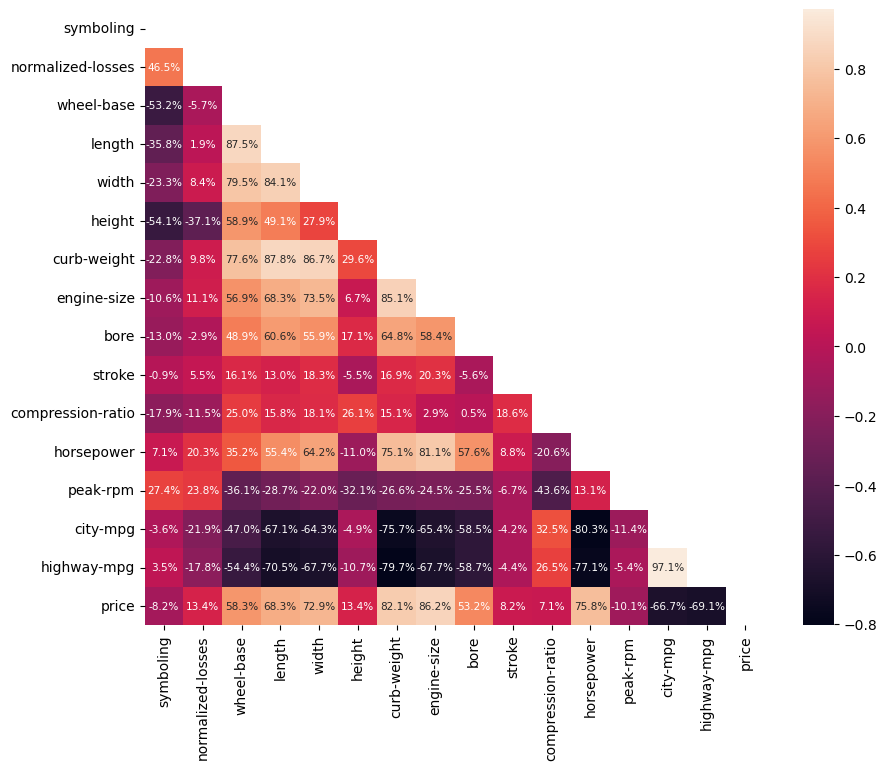

In [123]:
plt.figure(figsize =(10, 8))
mask = np.triu(np.ones_like(df.corr(numeric_only= True)))
sns.heatmap(data = df.corr(numeric_only= True), annot= True, fmt = ".1%", mask = mask, annot_kws={"size": 7.5})   
plt.show()        # "annot_kws" parameter allows you to specify additional keyword arguments to customize the appearance of the data cell values (annot) in the heatmap. It takes a dictionary of key-value pairs where the keys represent the properties you want to modify.You can include other properties such as color, weight, style, etc., to further customize the appearance of the data cell values.

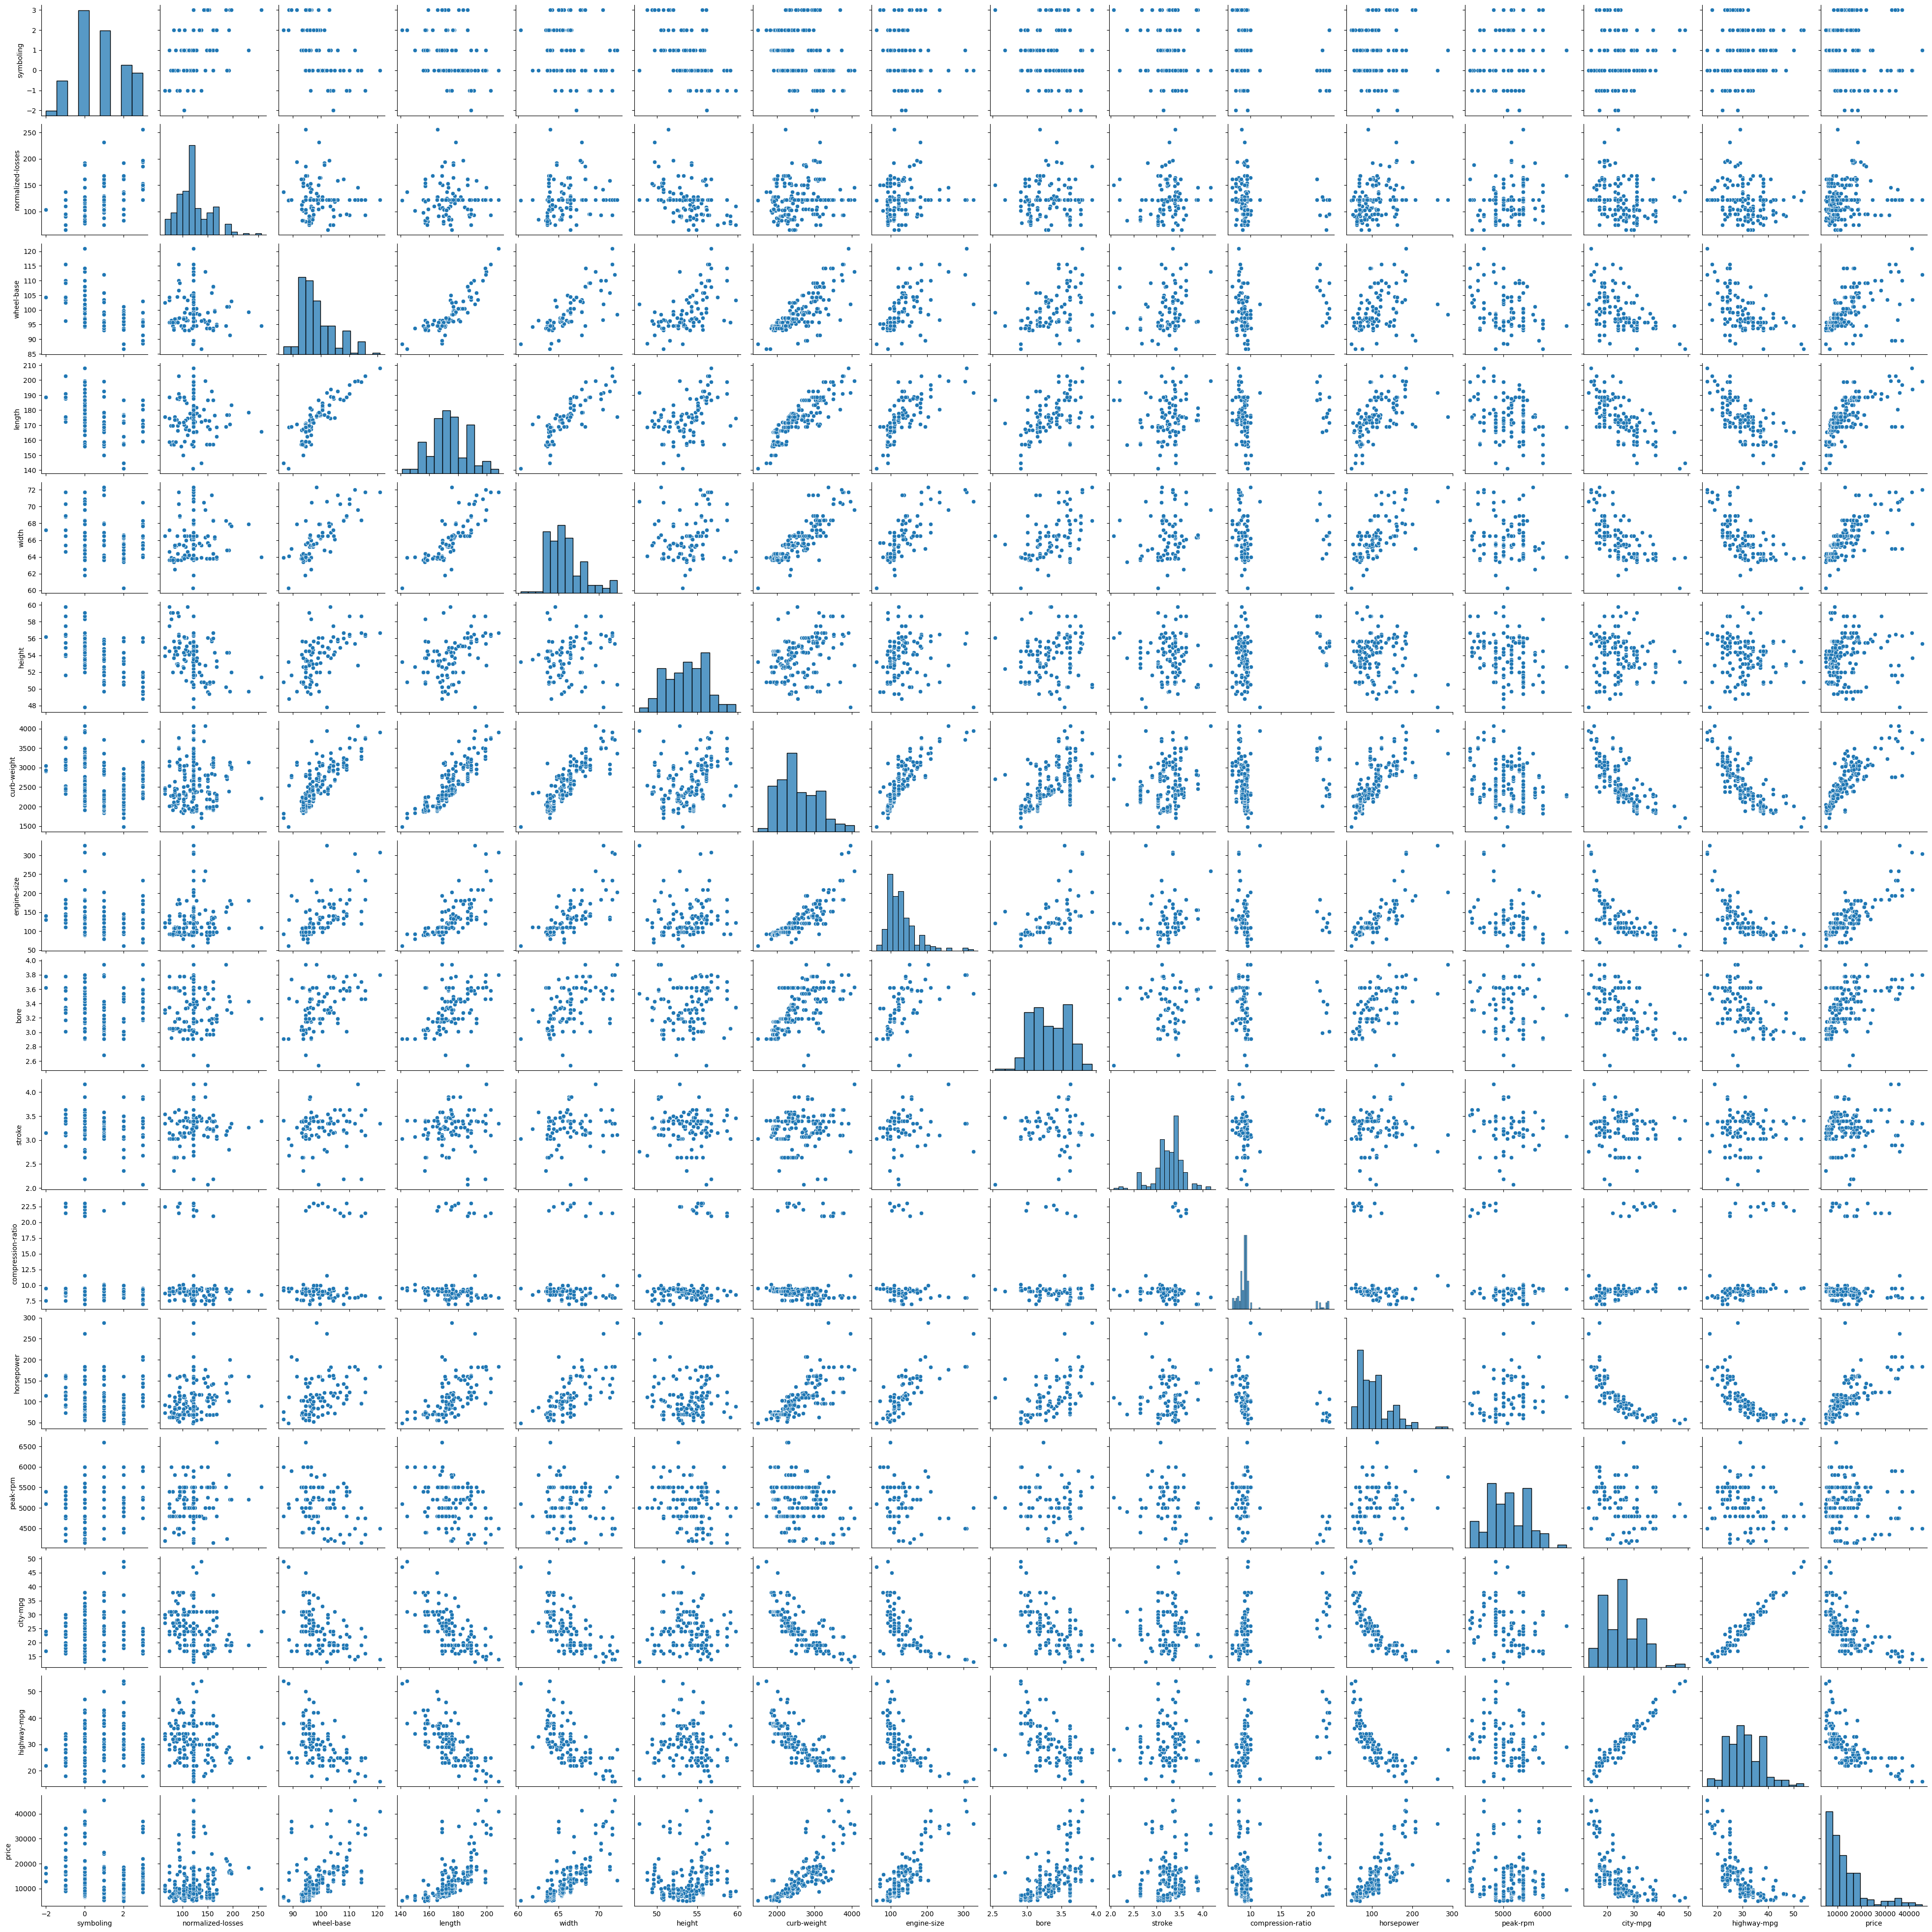

In [34]:
sns.pairplot(df)         # or we can create "regplot" individually for different pairs
plt.show()

According to the above plot as well as the heatmap (correlation plot), the dependent variable 'price' has a high correlation with the following independent variables:

1) enginesize
2) curbweight
3) horsepower
4) carwidth
5) carlength

Also there are some indpendent variables with which the dependent variable 'price' has negative correlation such as follows:

1) citympg
2) highwaympg

Some of the indepenent variables which have a high correlation with dependent variable 'price' have a high correlation among them also such as

1) enginesize with horsepower, carwidth and curbweight
2) curbweight with enginesize, carwidth and carlength

This is because of the multicollinearity between the independent variables.

**Price (Target variable) is:-** 

**-> Positively affected (correlated) by engine_size, curb_weight, horse_power, width,length, and wheel_base.**

**-> Negatively affected (correlated) with highway mpg and city mpg.**

First lets create Bins for the Target variable which will show the class of the automobile - Cheap, Budget, High or Luxury 

In [296]:
# Method 1

for i in df["price"].unique():
    if i < 7788:
        df.loc[df["price"] == i, "price-bin"] = "Cheap"
    elif i < 10595:
        df.loc[df["price"] == i, "price-bin"] = "Budget"
    elif i < 16500:
        df.loc[df["price"] == i, "price-bin"] = "High"
    else:
        df.loc[df["price"] == i, "price-bin"] = "Luxury"  # To delete this trial of method 1 --> df.drop(columns= "price-bin")

In [297]:
# Method 2

bins = np.linspace(min(df["price"]), max(df["price"]), 5)   # o/p -> array([ 5118. , 15188.5, 25259. , 35329.5, 45400. ])

# We can also write:->  bins = [0, 7788, 10595, 16500, np.inf] 
                # np.inf -> stands for positive infinity. It is used as the upper bound for the last bin in the bins list.

labels = ["Cheap", "Budget", "High", "Luxury"]     # Labels should be 1 less than bins

df["price-bin"] = pd.cut(df["price"], bins=bins, labels=labels, include_lowest = True ) 

# include_lowest = True ---> ensures that values below the lowest bin edge are included in the first bin, 
# right = True ---> specifies that the intervals are right-closed, meaning the upper bin edge is inclusive.

In [298]:
df.head(5)

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0      111.0   5000.0        21   
1         mpfi  3.47    2.68                9.0      111.0   5000.0        21   
2         mpfi  2.68    3.47                9.0      154.0   5000.0        19   
3         mpfi  3.19    3.40               10.0      102.0   5500.0        24   
4         mpfi  3.19    3.40                8.0      115.0   5500.0        18   

  highway-mpg    price  price-bin  
0          27  13495.0      Cheap  
1          27  16500.0     Budget  
2          26  16500.0     Budget  
3          30  13950.0      Cheap  
4          22  17450.0     Budget  

[5 rows x 27 columns]

In [299]:
df[df["price"] == max(df["price"])]

symboling  normalized-losses           make fuel-type aspiration  \
74          1              122.0  mercedes-benz       gas        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
74          two    hardtop          rwd           front       112.0  ...   

    fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  \
74         mpfi   3.8    3.35                8.0      184.0   4500.0   

    city-mpg highway-mpg    price  price-bin  
74        14          16  45400.0     Luxury  

[1 rows x 27 columns]

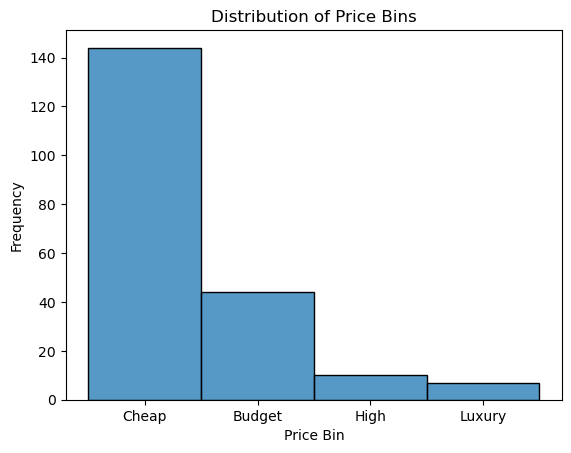

In [150]:
sns.histplot(df["price-bin"])
plt.xlabel("Price Bin")
plt.ylabel("Frequency")
plt.title("Distribution of Price Bins")
plt.show()

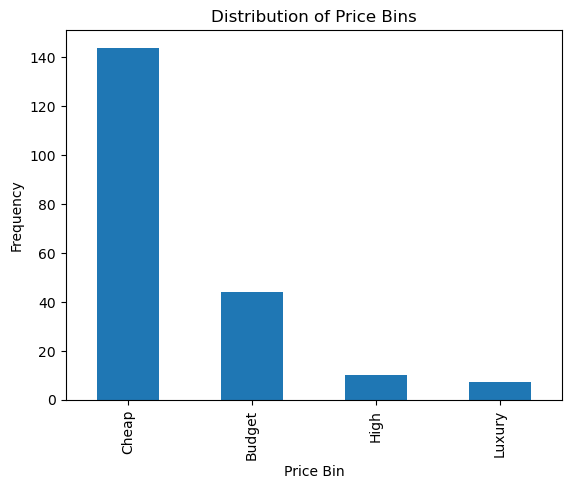

In [153]:
df["price-bin"].value_counts().plot(kind='bar')
plt.xlabel("Price Bin")
plt.ylabel("Frequency")
plt.title("Distribution of Price Bins")
plt.show()

#### Lets, now work on categorical features (independent variables)

In [301]:
for i in df.columns :
    print("{} = {}".format(i, df[i].unique()))

symboling = [ 3  1  2  0 -1 -2]
normalized-losses = [122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type = ['gas' 'diesel']
aspiration = ['std' 'turbo']
num-of-doors = ['two' 'four']
body-style = ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels = ['rwd' 'fwd' '4wd']
engine-location = ['front' 'rear']
wheel-base = [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.

In [302]:
# To select only "object" datatype columns in the dataframe 

df.select_dtypes(include=["object"]).columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [303]:
# Binary Categorical Features

binary_cols = []
for col in df.columns:
    if df[col].value_counts().shape[0] == 2 :
        binary_cols.append(col)
binary_cols         # 'fuel-type', 'aspiration', 'num-of-doors', 'engine-location' --> These are binary categorical features

['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']

### 1). 'fuel-type' feature

In [304]:
df["fuel-type"].value_counts()         

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

In [305]:
df[df["fuel-type"]== "gas"]["price-bin"].value_counts() 

price-bin
Cheap     133
Budget     39
Luxury      7
High        6
Name: count, dtype: int64

In [306]:
df[df["fuel-type"]== "diesel"]["price-bin"].value_counts() 

price-bin
Cheap     11
Budget     5
High       4
Luxury     0
Name: count, dtype: int64

<Axes: xlabel='fuel-type', ylabel='price'>

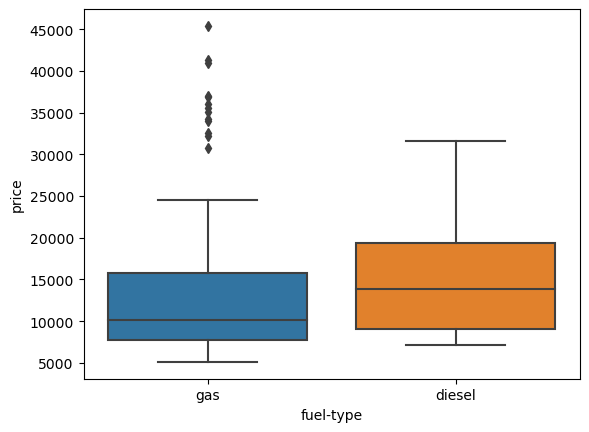

In [172]:
sns.boxplot(x= "fuel-type", y= "price", data = df)

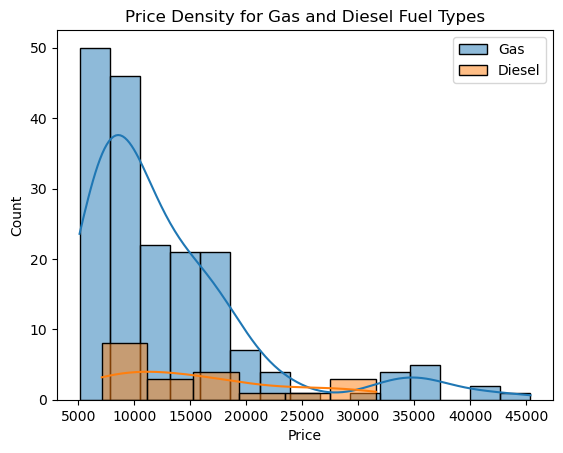

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for gas and diesel fuel types
ft_gas = df[df["fuel-type"] == "gas"]
ft_diesel = df[df["fuel-type"] == "diesel"]

# Plot the density curve for gas and diesel fuel types
sns.histplot(data=ft_gas["price"], kde = True, label="Gas")
sns.histplot(data=ft_diesel["price"], kde = True, label="Diesel")

# Set plot labels and title
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Density for Gas and Diesel Fuel Types")

# Show the legend and plot
plt.legend()
plt.show()


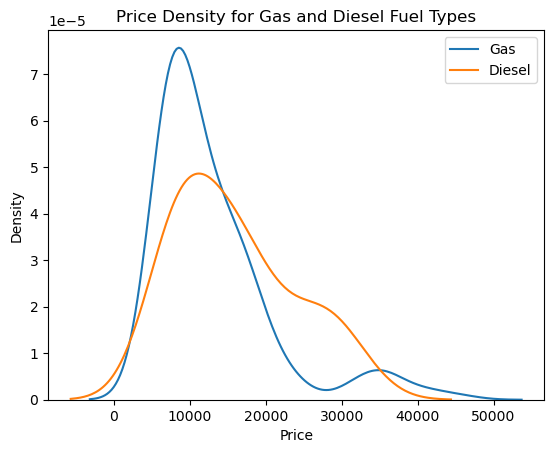

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for gas and diesel fuel types
ft_gas = df[df["fuel-type"] == "gas"]
ft_diesel = df[df["fuel-type"] == "diesel"]

# Plot the density curve for gas and diesel fuel types
sns.kdeplot(data=ft_gas["price"], label="Gas")
sns.kdeplot(data=ft_diesel["price"], label="Diesel")

# Set plot labels and title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Density for Gas and Diesel Fuel Types")

# Show the legend and plot
plt.legend()
plt.show()

**As both the categories (class) of fuel type has overlapping box-plot (distribution) so it's almost difficult for us to estimate price based on this 'fuel-type' feature.**

In [308]:
# If you want to see the outlier data

five_point_summ = [  df[df["fuel-type"] == "gas"]["price"].quantile(0),          # "min" 
                     df[df["fuel-type"] == "gas"]["price"].quantile(0.25),       # "Q1"
                     df[df["fuel-type"] == "gas"]["price"].quantile(0.5),        # "Q2" or "median"
                     df[df["fuel-type"] == "gas"]["price"].quantile(0.75),       # "Q3"
                     df[df["fuel-type"] == "gas"]["price"].quantile(1)  ]        # "max"
five_point_summ

[5118.0, 7689.0, 10198.0, 15750.0, 45400.0]

In [309]:
IQR = five_point_summ[3] - five_point_summ[1]
Q1 = df[df["fuel-type"] == "gas"]["price"].quantile(0.25)
Q3 = df[df["fuel-type"] == "gas"]["price"].quantile(0.75)

UT = Q1 + 1.5*IQR
LT = Q3 - 1.5*IQR

ft_gas = df[df["fuel-type"] == "gas"]

ft_gas_outliers = ft_gas[ft_gas["price"] > UT].reset_index()
ft_gas_outliers.shape[0]                                     # Thus, 20 outliers are there in price for fuel type "gas" 

20

In [201]:
df.groupby("fuel-type")["price"].sum().sort_values(ascending=False).reset_index()

fuel-type         price
0       gas  2.390699e+06
1    diesel  3.167630e+05

In [310]:
# Let's remove this feature as it will not help much in predicting the price of the car

df.drop(["fuel-type"], axis = 1, inplace = True)

### 2). Aspiration feature

In [211]:
df["aspiration"].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [213]:
df[df["aspiration"]== "std"]["price-bin"].value_counts() 

price-bin
Cheap     125
Budget     30
Luxury      7
High        6
Name: count, dtype: int64

In [214]:
df[df["aspiration"]== "turbo"]["price-bin"].value_counts() 

price-bin
Cheap     19
Budget    14
High       4
Luxury     0
Name: count, dtype: int64

<Axes: xlabel='aspiration', ylabel='price'>

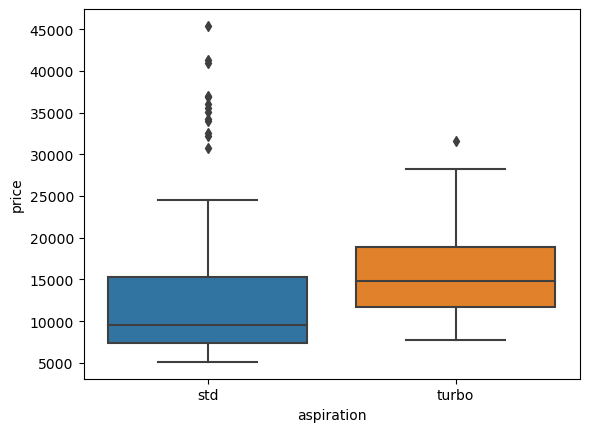

In [215]:
sns.boxplot(x = "aspiration", y = "price", data = df)

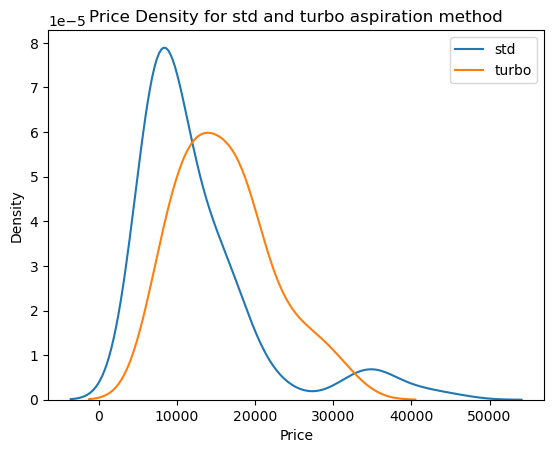

In [217]:
# Filter the dataframe for std and turbo aspiration method
ft_std = df[df["aspiration"] == "std"]
ft_turbo = df[df["aspiration"] == "turbo"]

# Plot the density curve for std and turbo aspiration method
sns.kdeplot(data=ft_std["price"], label="std")
sns.kdeplot(data=ft_turbo["price"], label="turbo")

# Set plot labels and title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Density for std and turbo aspiration method")

# Show the legend and plot
plt.legend()
plt.show()

**Again as both the categories (class) of aspiration has overlapping box-plot (distribution) so it's almost difficult for us to estimate price based on this 'aspiration' feature**

In [311]:
# Let's remove this feature as it will not help much in predicting the price of the car

df.drop(["aspiration"], axis = 1, inplace = True)

### 3). 'num-of-doors' feature

In [218]:
df["num-of-doors"].value_counts()

num-of-doors
four    116
two      89
Name: count, dtype: int64

In [220]:
df[df["num-of-doors"] == "four"]["price-bin"].value_counts()

price-bin
Cheap     78
Budget    29
High       6
Luxury     3
Name: count, dtype: int64

In [222]:
df[df["num-of-doors"] == "two"]["price-bin"].value_counts()

price-bin
Cheap     66
Budget    15
High       4
Luxury     4
Name: count, dtype: int64

In [117]:
df.groupby("num-of-doors")["price"].sum().apply(lambda x : "{:,.0f} $".format(x)).sort_values(ascending=False).reset_index()

num-of-doors        price
0         four  1,565,481 $
1          two  1,141,980 $

<Axes: xlabel='num-of-doors', ylabel='price'>

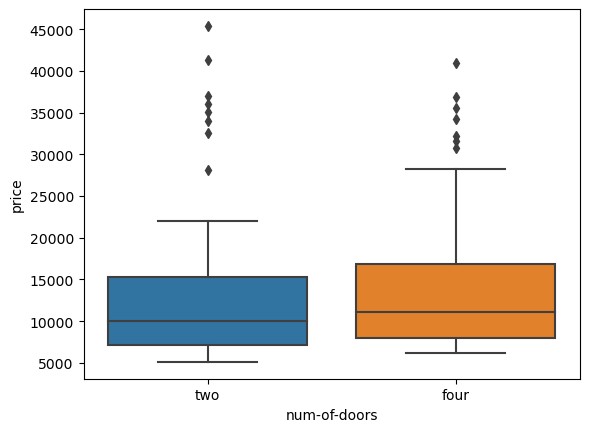

In [224]:
sns.boxplot(x= "num-of-doors", y = "price", data = df)

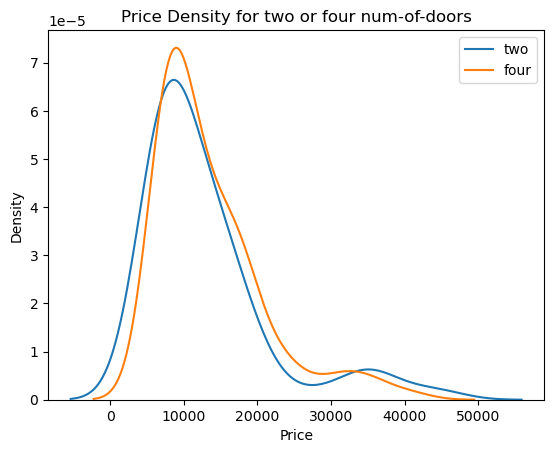

In [225]:
# Filter the dataframe for two or four num-of-doors
nod_two = df[df["num-of-doors"] == "two"]
nod_four = df[df["num-of-doors"] == "four"]

# Plot the density curve for two or four num-of-doors
sns.kdeplot(data=nod_two["price"], label="two")
sns.kdeplot(data=nod_four["price"], label="four")

# Set plot labels and title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Density for two or four num-of-doors")

# Show the legend and plot
plt.legend()
plt.show()

**Again as both the categories (class) of num-of-doors has overlapping box-plot (distribution) so it's almost difficult for us to estimate price based on this 'num-of-doors' feature.**

In [312]:
# Let's remove this feature as it will not help much in predicting the price of the car

df.drop(["num-of-doors"], axis = 1, inplace = True)

### 4). Engine-location

In [22]:
df['engine-location'].value_counts()

engine-location
front    202
rear       3
Name: count, dtype: int64

In [27]:
df[df['engine-location']== "rear"][["make","body-style","price", "price-bin"]]   # only porsche has engine in rear

make   body-style    price price-bin
126  porsche      hardtop  32528.0      High
127  porsche      hardtop  34028.0      High
128  porsche  convertible  37028.0    Luxury

In [28]:
df[df['engine-location']== "front"]["price-bin"].value_counts()

price-bin
Cheap     144
Budget     44
High        8
Luxury      6
Name: count, dtype: int64

<Axes: xlabel='engine-location', ylabel='price'>

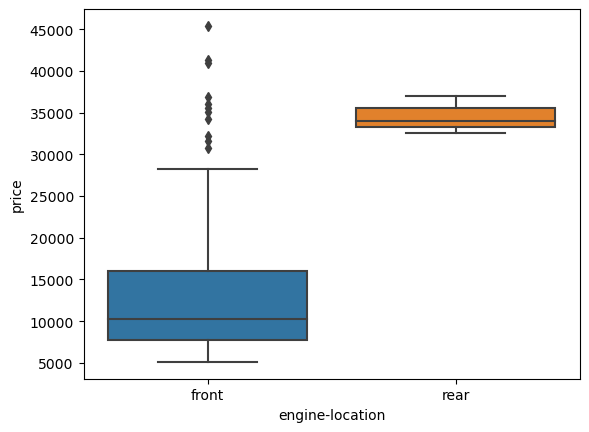

In [30]:
sns.boxplot(x = "engine-location", y = "price", data = df)

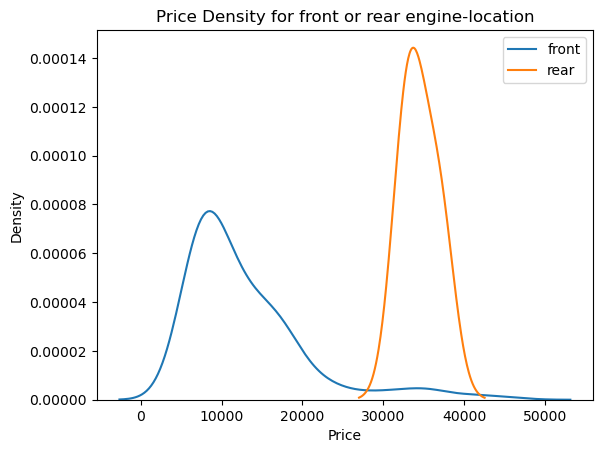

In [31]:
# Filter the dataframe for front or rear engine-location
el_front = df[df['engine-location']== "front"]
el_rear = df[df['engine-location']== "rear"]

# Plot the density curve for front or rear engine-location
sns.kdeplot(data=el_front["price"], label="front")
sns.kdeplot(data=el_rear["price"], label="rear")

# Set plot labels and title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Price Density for front or rear engine-location")

# Show the legend and plot
plt.legend()
plt.show()

The car is pricier if Eventhough the distribution are different but only 3 records we have for the rear engine-location, so it would be difficult to predict the price baed on the engine-location

**Let's analyse other categorical variables**

### 5). symboling

We will be reducing it's categories which help in building a model as there will be less number of columns when we will use encoding technique ( dummy variable )

Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

Mapping as follows:-

- -3,-2,-1: safe
- 0, 1 : moderate
- 2, 3 : risky

In [313]:
#mapping in 'symboling'

df["symboling"] = df["symboling"].map({-3: 'safe', -2: 'safe', -1: 'safe', 0: 'moderate', 1: 'moderate', 2:'risky', 3:'risky'})
df["symboling"]

0         risky
1         risky
2      moderate
3         risky
4         risky
         ...   
200        safe
201        safe
202        safe
203        safe
204        safe
Name: symboling, Length: 205, dtype: object

In [314]:
df["symboling"].value_counts()

symboling
moderate    121
risky        59
safe         25
Name: count, dtype: int64

In [315]:
df.groupby(["symboling", "make"])["price"].sum().round()

symboling  make         
moderate   alfa-romero       16500.0
           audi              73712.0
           bmw              192520.0
           chevrolet         12870.0
           dodge             48994.0
           honda             93067.0
           isuzu             33199.0
           jaguar           103800.0
           mazda            129019.0
           mercedes-benz    114536.0
           mercury           16503.0
           mitsubishi        32146.0
           nissan           142335.0
           peugot           170380.0
           plymouth          34059.0
           porsche           13207.0
           renault            9295.0
           subaru            82721.0
           toyota           132076.0
           volkswagen        39430.0
risky      alfa-romero       29995.0
           audi              46650.0
           bmw               16430.0
           chevrolet          5151.0
           dodge             12964.0
           honda             13334.0
           is

In [316]:
df.pivot_table(index = "make", columns = "symboling", values = "price", aggfunc= sum, fill_value= 0, sort = True)

symboling           moderate   risky    safe
make                                        
alfa-romero     16500.000000   29995       0
audi            73712.129353   46650       0
bmw            192520.000000   16430       0
chevrolet       12870.000000    5151       0
dodge           48994.000000   12964    8921
honda           93067.000000   13334       0
isuzu           33199.258706   11048       0
jaguar         103800.000000       0       0
mazda          129019.000000   52080       0
mercedes-benz  114536.000000   35056  119584
mercury         16503.000000       0       0
mitsubishi      32146.000000   78692    9279
nissan         142335.000000   45147       0
peugot         170380.000000       0       0
plymouth        34059.000000   12764    8921
porsche         13207.129353  125602       0
renault          9295.000000    9895       0
saab                0.000000   91340       0
subaru          82721.000000   19774       0
toyota         132076.000000  101050   83220
volkswagen      39430.000000   81500       0
volvo               0.000000       0  198695

<Axes: xlabel='symboling', ylabel='price'>

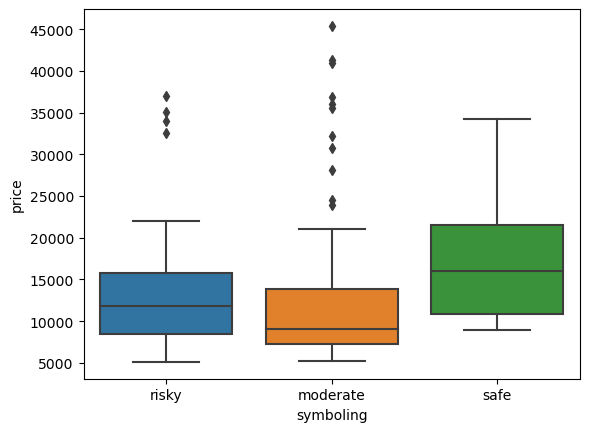

In [69]:
sns.boxplot(x = "symboling", y = "price", data = df)

The car which are safer or safer insurance are pricier, as compared to other.

--> Volvo cars are insured (safer)
--> saab cars are very risky (less insured)

### 6) make 

In [317]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [318]:
df["make"].value_counts()    # toyota is the most sold car

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

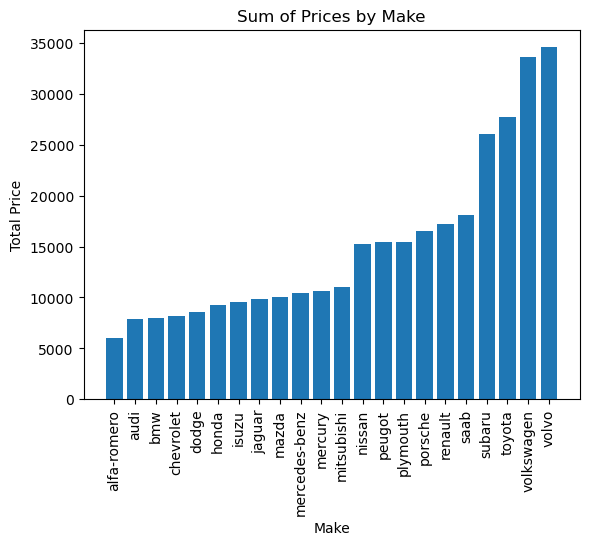

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'make' and calculate the sum of 'price'
y = df.groupby(['make'])["price"].mean().sort_values(ascending = True)

# Get the unique values of 'make' for x-axis
x = df["make"].unique()

# Create a bar chart
plt.bar(x, y)
plt.xlabel('Make')
plt.ylabel('Total Price')
plt.title('Average Prices by Make')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

Thus, it seems like Volvo are the most costliers and alfra-romero are the least costly. However we don't know the variances. Also that can be due to the quantity of the cars sold, thus we have make a box plot.

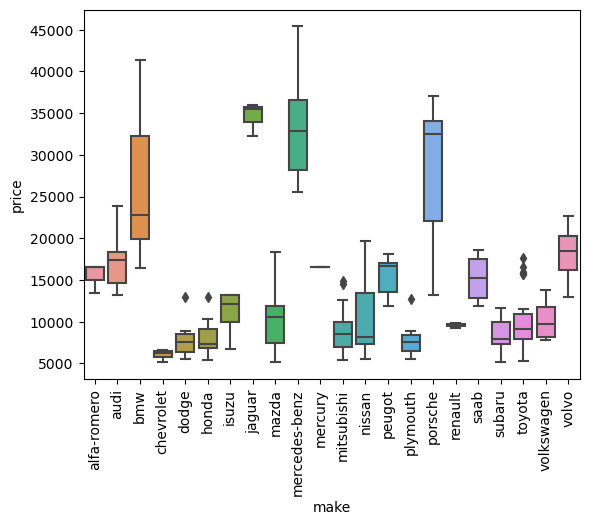

In [105]:
sns.boxplot(x = "make", y = "price", data = df)
plt.xticks(rotation = 90)
plt.show()

Thus, Car's Company seems to have an effect on price such as Jaguar, mercedes-benz, bmw and Porsche are higly expensive cars.

Let's compare multiple brands and see which has more impact on the price prediction. Will use One-Way ANOVA for this.

In [319]:
# 1) Between Volvo and Volkswagen

# H0 = There is no significant diff. between the mean price of Volvo and volkswagen. (µ₁ = µ₂)
# H1 = There is significant diff. between the mean price of Volvo and volkswagen. (µ₁ ≠ µ₂)

import pandas as pd
from scipy import stats

F, p = stats.f_oneway(df[df['make']== "volvo"]["price"], df[df['make']== "volkswagen"]["price"])
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  8.337963989000253e-07
reject null hypothesis


In [320]:
# 2) Between Mitsubishi, nissan and peugot 

F, p = stats.f_oneway(df[df['make']== "mitsubishi"]["price"], df[df['make']== "nissan"]["price"],  df[df['make']== "peugot"]["price"])
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
## Eventhough from graph it looked like there is no significant difference b/w three however there is as F is large thus there is more variability b/w the groups.

p-value for significance is:  0.000278935407099898
reject null hypothesis


In [321]:
# 3) Between Mitsubishi and nissan

F, p = stats.f_oneway(df[df['make']== "mitsubishi"]["price"], df[df['make']== "nissan"]["price"])
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
# Thus the variability was due to peugot

p-value for significance is:  0.419803083132513
accept null hypothesis


As for creation of our model we have to reduce the categories of each categorical variable as much as we can to reduce no. of columns generated after Encoding.
**Thus, Companies have to be divided into buckets of low, medium, high on the basis of the median of their price as due to the presence of the outliers median is the appropriate selection for division.**

In [322]:
# creating a dict 'company price' where key = car's company and value = median of their price

company_price = dict(df.groupby(['make'])["price"].median().round(1))
company_price

{'alfa-romero': 16500.0,
 'audi': 17450.0,
 'bmw': 22835.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 12127.6,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercedes-benz': 32892.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [323]:
# division in the buckets of low i.e. below 10000, medium i.e. range b/w 10000 and 20000 and high i.e. above 20000

for i in company_price.keys():
    
    if company_price[i] <= 10000:
        company_price[i]='low'
        
    elif (company_price[i] > 10000) & (company_price[i] < 20000):
        company_price[i]='med'
        
    else:
        company_price[i]='high'
        
company_price

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'med',
 'jaguar': 'high',
 'mazda': 'med',
 'mercedes-benz': 'high',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [324]:
# mapping the company_price on the 'make' column in the dataset 

df["make"] = df["make"].map(company_price)

# checking the column's unique values

df["make"].unique()

array(['med', 'high', 'low'], dtype=object)

### 6). body-style

In [106]:
df["body-style"].value_counts()

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [123]:
df.groupby("body-style")["price"].sum().apply(lambda x: "{:,.1f}k $".format(x/1000)).sort_values(ascending= False).reset_index()

body-style       price
0    hatchback    703.5k $
1        wagon    309.3k $
2      hardtop    177.7k $
3  convertible    131.3k $
4        sedan  1,385.6k $

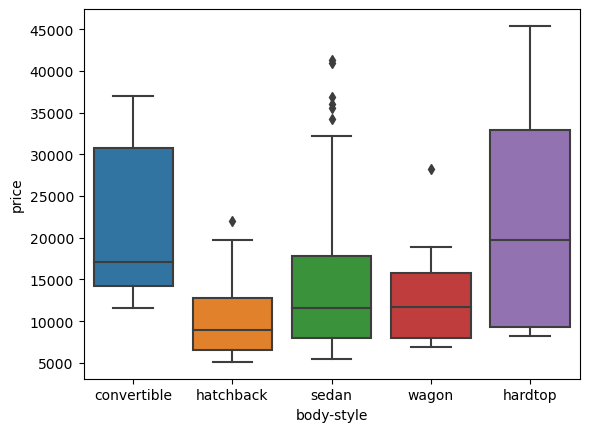

In [124]:
sns.boxplot(x = "body-style", y = "price", data = df)
plt.show()

### 7) drive-wheels

In [129]:
df["drive-wheels"].value_counts()

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [143]:
df.groupby(["drive-wheels"])["price"].sum().apply(lambda x: "{:,.0f}".format(x)).reset_index()

drive-wheels      price
0          4wd     95,135
1          fwd  1,117,298
2          rwd  1,495,028

<Axes: xlabel='drive-wheels', ylabel='price'>

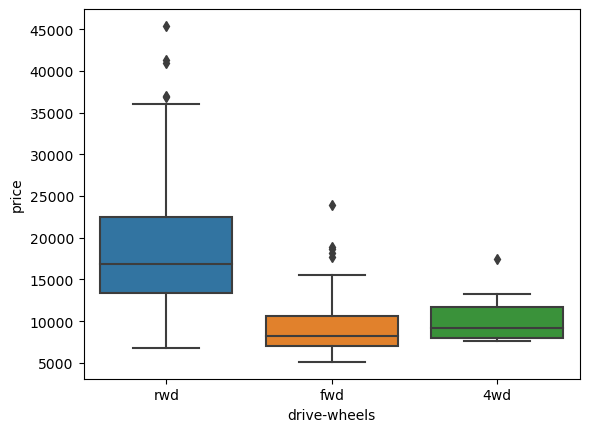

In [145]:
sns.boxplot(x = "drive-wheels",y = "price",data = df)

rwd (rear wheel drive) cars seems to be pricier

### 8). 'engine-type'

In [151]:
df["engine-type"].value_counts()

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [159]:
df[df['engine-type'] == "dohcv"]  

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
129  moderate              122.0  porsche       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
129  hatchback          rwd           front        98.4  ...         mpfi   

     bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
129  3.94    3.11               10.0      288.0   5750.0        17   

    highway-mpg         price  price-bin  
129          28  13207.129353      Cheap  

[1 rows x 27 columns]

<Axes: xlabel='engine-type', ylabel='price'>

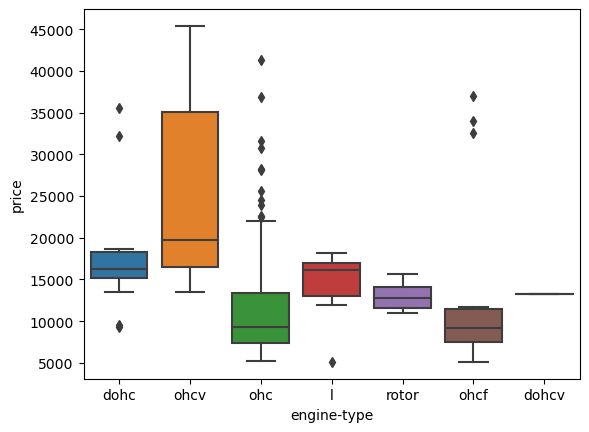

In [160]:
sns.boxplot(x = "engine-type", y = "price", data = df)

### 9). 'num-of-cylinders'

In [162]:
df["num-of-cylinders"].value_counts()

num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [174]:
df[(df["num-of-cylinders"] == "two") | (df["num-of-cylinders"] == "three") | (df["num-of-cylinders"] == "four")]["price-bin"].value_counts()  

# only cheap and budget 

price-bin
Cheap     138
Budget     26
High        0
Luxury      0
Name: count, dtype: int64

In [178]:
df[df["num-of-cylinders"] == "twelve"]["price-bin"].value_counts()    # only luxury

price-bin
Luxury    1
Cheap     0
Budget    0
High      0
Name: count, dtype: int64

<Axes: xlabel='num-of-cylinders', ylabel='price'>

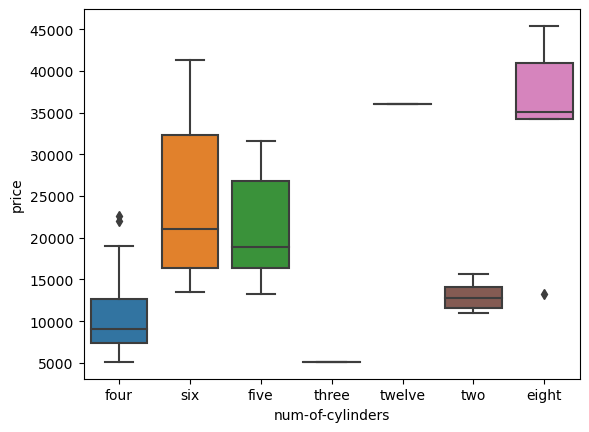

In [176]:
sns.boxplot(x = "num-of-cylinders", y = "price", data = df)

In [181]:
df[df["num-of-cylinders"] == "eight"][df[df["num-of-cylinders"] == "eight"]["price-bin"] == "Cheap"]    # Outlier in eight no. of cylinder

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
129  moderate              122.0  porsche       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
129  hatchback          rwd           front        98.4  ...         mpfi   

     bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
129  3.94    3.11               10.0      288.0   5750.0        17   

    highway-mpg         price  price-bin  
129          28  13207.129353      Cheap  

[1 rows x 27 columns]

As the number of cylinders increases, price of the car also increases.

In the case of the "number of cylinders" column with unique values of two, four, six, and eight, you have two main options for incorporating it into a model:

- 1) Dummy variable approach: If the number of cylinders represents a categorical variable with no inherent ordinal relationship (e.g., different engine types), you can create dummy variables. Create separate binary variables for each unique value (two, four, six, eight) and assign a value of 1 if the observation matches that category and 0 otherwise. This approach allows the model to capture any non-linear relationships or interactions between the number of cylinders and the dependent variable.

- 2) Numeric encoding: If the number of cylinders has an ordinal relationship (e.g., increasing number of cylinders implies a higher capacity), you can assign numeric values directly to the categories. In this case, you would change the values of the column to 2, 4, 6, and 8, respectively, before using it in the model. This approach assumes a linear relationship between the number of cylinders and the dependent variable.

The choice between these approaches depends on the nature of the relationship between the number of cylinders and the dependent variable, as well as your understanding of the underlying domain. If you believe the number of cylinders has a categorical impact on the outcome, using dummy variables would be more appropriate. If you believe there is an ordinal relationship, numeric encoding may be suitable.

In [325]:
# Let's change it as we have observed that as cylinder number increases the price of the car increases, thus ordinal relationship is there.

cylindernumber_replacement = {"two" : 2, "three" : 3 , "four" : 4,  "five": 5, "six" : 6, "eight" : 8 , "twelve" : 12}

df = df.replace({"num-of-cylinders" : cylindernumber_replacement})

In [326]:
df.head(2)

symboling  normalized-losses make   body-style drive-wheels engine-location  \
0     risky              122.0  med  convertible          rwd           front   
1     risky              122.0  med  convertible          rwd           front   

   wheel-base  length  width  height  ...  fuel-system  bore  stroke  \
0        88.6   168.8   64.1    48.8  ...         mpfi  3.47    2.68   
1        88.6   168.8   64.1    48.8  ...         mpfi  3.47    2.68   

   compression-ratio horsepower  peak-rpm  city-mpg  highway-mpg    price  \
0                9.0      111.0    5000.0        21           27  13495.0   
1                9.0      111.0    5000.0        21           27  16500.0   

   price-bin  
0      Cheap  
1     Budget  

[2 rows x 24 columns]

😁😁**Thus, we can sum up our observations :**

**1) fuel-type, num-of-doors, aspiration** - Doesn't have much of an impact on the price of a car ( thus we can remove them from our model )

**2) Cars are clearly pricer with:**
   - **engine location** --> rear engine location
   - **symboling** --> less risk i.e. safer insurance
   - **number of cylinders** --> high numbers of cylinders
   - **make** --> Jaguar, mercedes-benz, bmw and Porsche

## Numerical columns

In [340]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['normalized-losses', 'wheel-base', 'height', 'num-of-cylinders', 'bore',
       'stroke', 'compression-ratio', 'peak-rpm', 'price',
       'engine-size/horsepower', 'curb-weight/engine-size', 'width/length',
       'highway-mpg/city-mpg'],
      dtype='object')

In [341]:
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
numerical_columns

Index(['normalized-losses', 'wheel-base', 'height', 'num-of-cylinders', 'bore',
       'stroke', 'compression-ratio', 'peak-rpm', 'price',
       'engine-size/horsepower', 'curb-weight/engine-size', 'width/length',
       'highway-mpg/city-mpg'],
      dtype='object')

According to the pair plot as well as the heatmap (correlation plot), the dependent variable 'price' has a high correlation with the following independent variables:

1) engine-size
2) curb-weight
3) horsepower
4) width
5) length
6) wheel-base
7) bore

Also there are some indpendent variables with which the dependent variable 'price' has negative correlation such as follows:

8) city-mpg
9) highway-mpg

Some of the indepenent variables which have a high correlation with dependent variable 'price' have a high correlation among them also such as

1) engine-size with horsepower, width and curb-weight
2) curb-weight with engine-size, width and length

This is because of the multicollinearity between the independent variables.

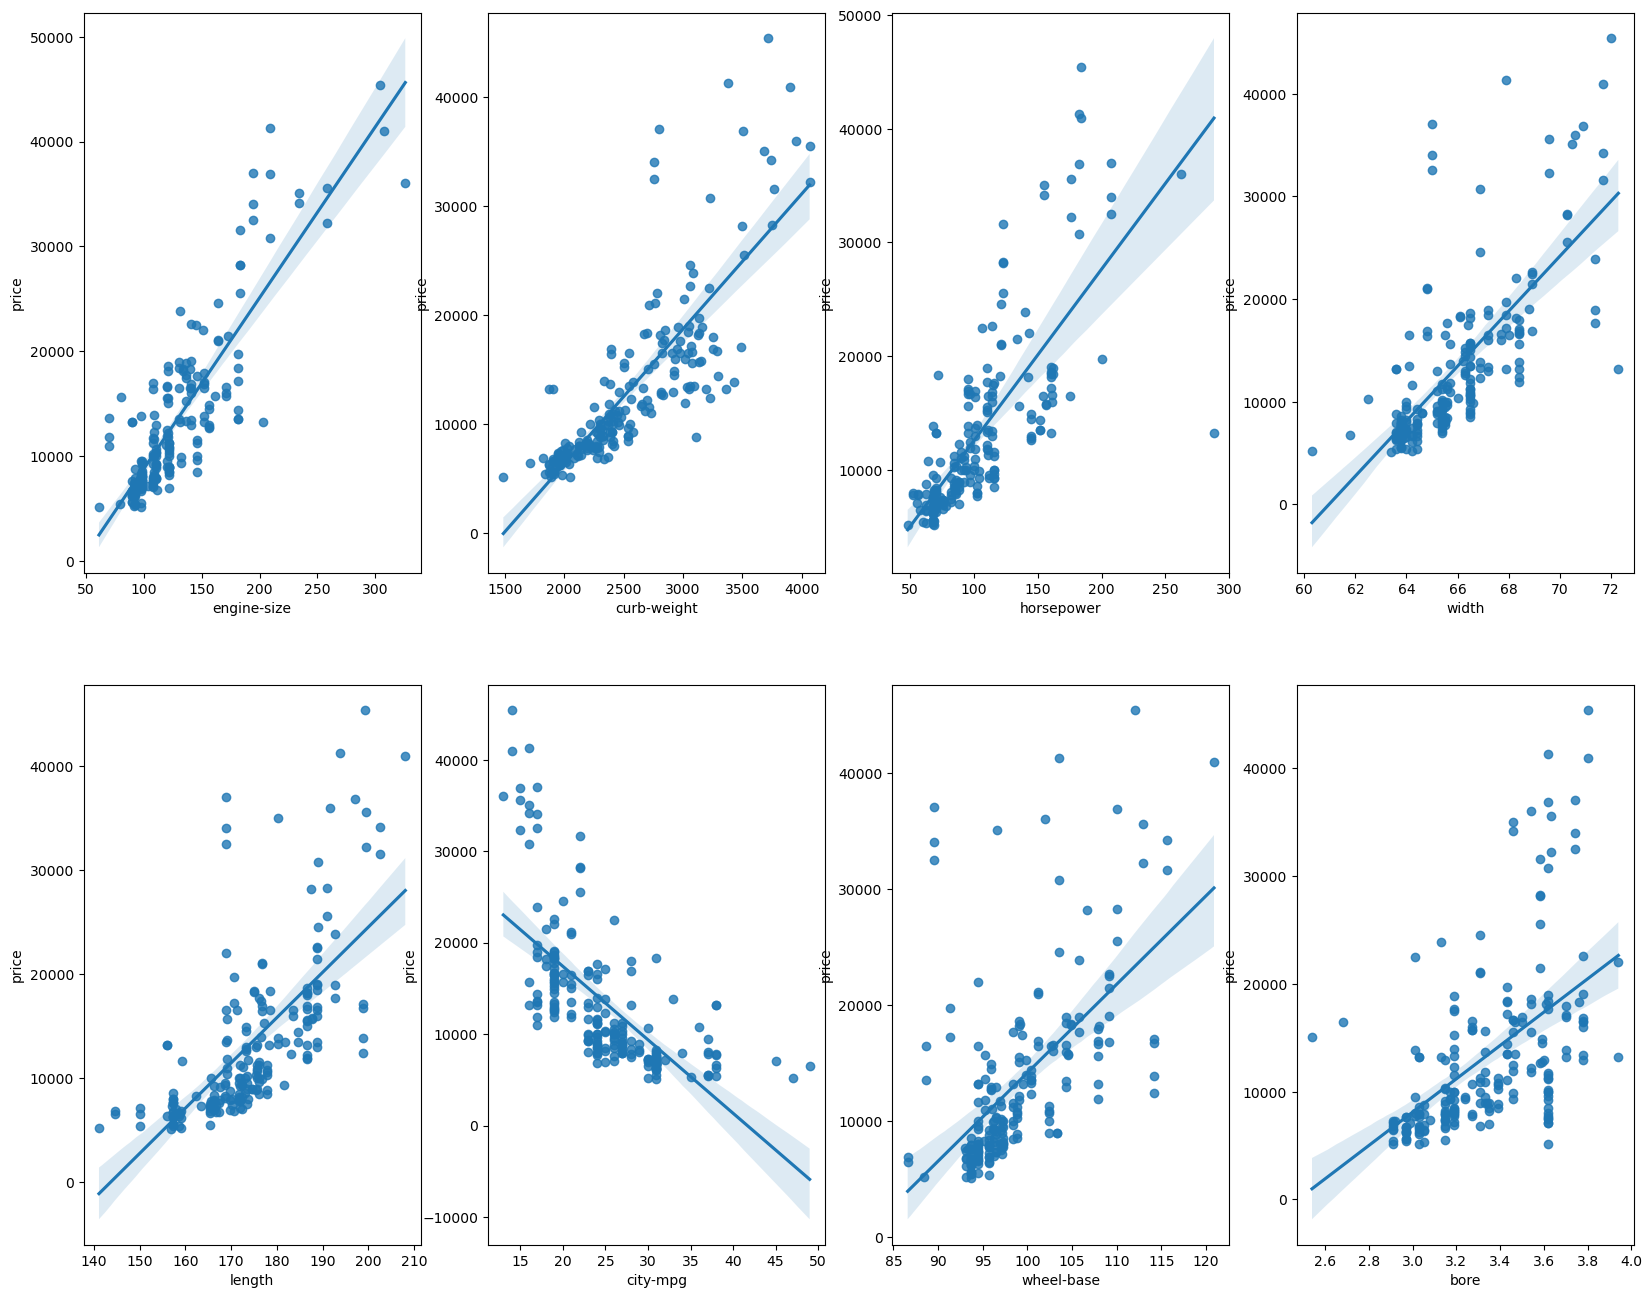

In [197]:
plt.figure(figsize=(20, 16))
plt.subplot(2,4,1)
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.subplot(2,4,2)
sns.regplot(x = 'curb-weight', y = 'price', data = df)
plt.subplot(2,4,3)
sns.regplot(x = 'horsepower', y = 'price', data = df)
plt.subplot(2,4,4)
sns.regplot(x = 'width', y = 'price', data = df)
plt.subplot(2,4,5)
sns.regplot(x = 'length', y = 'price', data = df)
plt.subplot(2,4,6)
sns.regplot(x = 'city-mpg', y = 'price', data = df)
plt.subplot(2,4,7)
sns.regplot(x = 'wheel-base', y = 'price', data = df)
plt.subplot(2,4,8)
sns.regplot(x = 'bore', y = 'price', data = df)
plt.show()

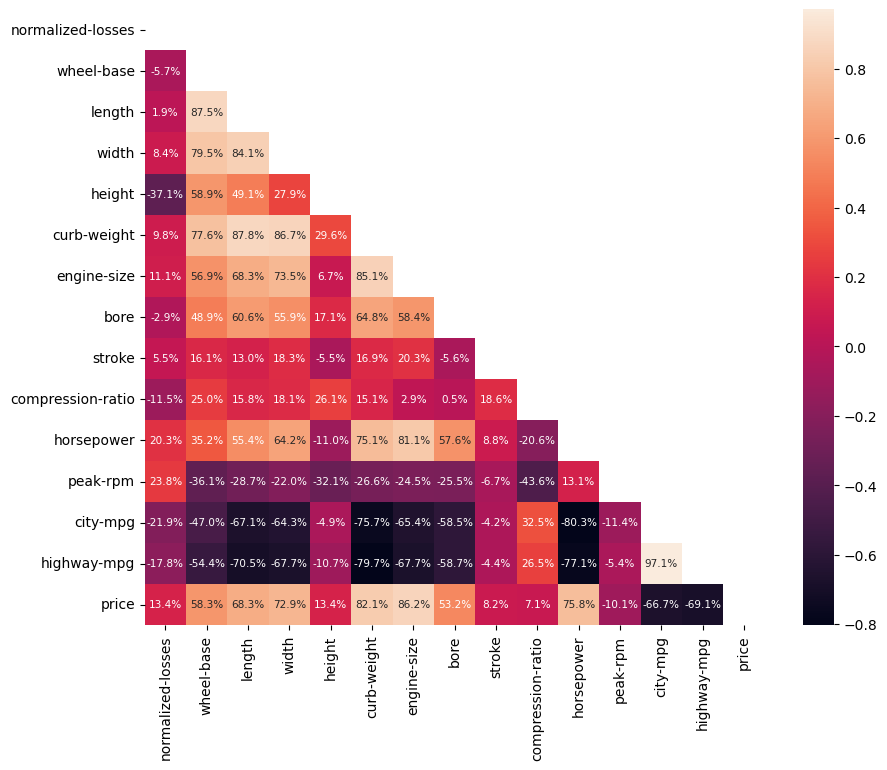

In [198]:
plt.figure(figsize =(10, 8))
mask = np.triu(np.ones_like(df.corr(numeric_only= True)))
sns.heatmap(data = df.corr(numeric_only= True), annot= True, fmt = ".1%", mask = mask, annot_kws={"size": 7.5})   
plt.show()  

In [334]:
# As, both city-mpg and highway-mpg has very high correlation - 97.1 % lets check whether they have significant difference. 

# HO = there is no significant differnce b/w city-mpg and highway-mpg

city_mpg = df["city-mpg"]
high_mpg = df["highway-mpg"]
from scipy.stats import ttest_ind

t_test,p_val = ttest_ind(city_mpg, high_mpg)
print(p_val)
# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:      
    print("We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis")  # Thus there is significant difference b/w both the variables


1.1688699865371373e-15
We can reject the null hypothesis


When dealing with highly correlated independent variables in linear regression, multicollinearity can pose challenges to the model interpretation and stability. In such cases, you have a few options:

1) Include both variables: If both independent variables have a strong correlation with the dependent variable and are theoretically relevant, you can choose to include them in the model. However, be aware that high multicollinearity between the variables may lead to unstable and unreliable coefficient estimates. This can make it difficult to interpret the individual effects of each variable.

2) Remove one variable: If the two independent variables are highly correlated and provide similar information, you may decide to remove one of them from the model. This can help reduce multicollinearity and improve the interpretability of the remaining variables. Consider which variable is more conceptually or theoretically important, or which variable aligns better with the research question.

3) Create a new variable: Instead of using the two highly correlated variables separately, you can create a new variable that combines their information. For example, the idea of creating a ratio of the two variables. This can be a valid approach if it makes sense in the context of your research. By creating a new variable, you can capture the combined effect of both variables while potentially reducing multicollinearity.

Before making a decision, it's crucial to assess the severity of multicollinearity using techniques such as variance inflation factor (VIF) analysis. High VIF values (typically above 5 or 10) indicate significant multicollinearity.

#### Creation of Derived Variable

In [335]:
# Creating variable 'enginesize/horsepower'

df['engine-size/horsepower'] = df["engine-size"]/ df["horsepower"]

# creating variable 'curbweight/enginesize'

df['curb-weight/engine-size'] = df["curb-weight"]/df["engine-size"]

# creating variable 'carwidth/carlength'     --> or we can take volume (length*width*height)

df['width/length'] = df['width']/df['length']

# creating variable 'highwaympg/citympg'

df['highway-mpg/city-mpg'] = df['highway-mpg']/df['city-mpg']

In [336]:
# Now drop the original variables as their corresponding derived variables have been formed, Also we will drop - price -bin.

# dropping the unncessary variables

df.drop(['engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'highway-mpg', 'city-mpg', 'price-bin'], 
             axis=1, inplace=True)

In [337]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'height', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'peak-rpm', 'price', 'engine-size/horsepower',
       'curb-weight/engine-size', 'width/length', 'highway-mpg/city-mpg'],
      dtype='object')

In [338]:
df.select_dtypes(include = ["int", "float"]).columns

Index(['normalized-losses', 'wheel-base', 'height', 'num-of-cylinders', 'bore',
       'stroke', 'compression-ratio', 'peak-rpm', 'price',
       'engine-size/horsepower', 'curb-weight/engine-size', 'width/length',
       'highway-mpg/city-mpg'],
      dtype='object')

In [339]:
df.select_dtypes(include = ["object"]).columns

Index(['symboling', 'make', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'fuel-system'],
      dtype='object')

### Regression Model

#### Creation of Dummy Variables


In [342]:
# Creating dummy variable for categorical variables

df = pd.get_dummies(df)

#checking the dataset
df.head().T

# The get_dummies() function in pandas by default creates dummy variables with True and False values. 
# If you prefer to have the dummy variables encoded as 1 and 0, you can specify the dtype parameter as int (dtype = int) when calling the function.

0         1          2          3          4
normalized-losses           122.0     122.0      122.0      164.0      164.0
wheel-base                   88.6      88.6       94.5       99.8       99.4
height                       48.8      48.8       52.4       54.3       54.3
num-of-cylinders                4         4          6          4          5
bore                         3.47      3.47       2.68       3.19       3.19
stroke                       2.68      2.68       3.47        3.4        3.4
compression-ratio             9.0       9.0        9.0       10.0        8.0
peak-rpm                   5000.0    5000.0     5000.0     5500.0     5500.0
price                     13495.0   16500.0    16500.0    13950.0    17450.0
engine-size/horsepower   1.171171  1.171171   0.987013   1.068627   1.182609
curb-weight/engine-size      19.6      19.6  18.572368  21.440367  20.764706
width/length             0.379739  0.379739   0.382593   0.374858   0.375991
highway-mpg/city-mpg     1.285714  1.285714   1.368421       1.25   1.222222
symboling_moderate          False     False       True      False      False
symboling_risky              True      True      False       True       True
symboling_safe              False     False      False      False      False
make_high                   False     False      False      False      False
make_low                    False     False      False      False      False
make_med                     True      True       True       True       True
body-style_convertible       True      True      False      False      False
body-style_hardtop          False     False      False      False      False
body-style_hatchback        False     False       True      False      False
body-style_sedan            False     False      False       True       True
body-style_wagon            False     False      False      False      False
drive-wheels_4wd            False     False      False      False       True
drive-wheels_fwd            False     False      False       True      False
drive-wheels_rwd             True      True       True      False      False
engine-location_front        True      True       True       True       True
engine-location_rear        False     False      False      False      False
engine-type_dohc             True      True      False      False      False
engine-type_dohcv           False     False      False      False      False
engine-type_l               False     False      False      False      False
engine-type_ohc             False     False      False       True       True
engine-type_ohcf            False     False      False      False      False
engine-type_ohcv            False     False       True      False      False
engine-type_rotor           False     False      False      False      False
fuel-system_1bbl            False     False      False      False      False
fuel-system_2bbl            False     False      False      False      False
fuel-system_4bbl            False     False      False      False      False
fuel-system_idi             False     False      False      False      False
fuel-system_mfi             False     False      False      False      False
fuel-system_mpfi             True      True       True       True       True
fuel-system_spdi            False     False      False      False      False
fuel-system_spfi            False     False      False      False      False

In [354]:
df.replace({True: 1, False: 0}, inplace=True)

In [355]:
df.columns.shape 

(44,)

In [356]:
df.describe()

normalized-losses  wheel-base      height  num-of-cylinders  \
count         205.000000  205.000000  205.000000        205.000000   
mean          122.000000   98.756585   53.724878          4.380488   
std            31.681008    6.021776    2.443522          1.080854   
min            65.000000   86.600000   47.800000          2.000000   
25%           101.000000   94.500000   52.000000          4.000000   
50%           122.000000   97.000000   54.100000          4.000000   
75%           137.000000  102.400000   55.500000          4.000000   
max           256.000000  120.900000   59.800000         12.000000   

             bore      stroke  compression-ratio     peak-rpm         price  \
count  205.000000  205.000000         205.000000   205.000000    205.000000   
mean     3.329751    3.255423          10.142537  5125.369458  13207.129353   
std      0.270844    0.313597           3.972040   476.979093   7868.768212   
min      2.540000    2.070000           7.000000  4150.000000   5118.000000   
25%      3.150000    3.110000           8.600000  4800.000000   7788.000000   
50%      3.310000    3.290000           9.000000  5200.000000  10595.000000   
75%      3.580000    3.410000           9.400000  5500.000000  16500.000000   
max      3.940000    4.170000          23.000000  6600.000000  45400.000000   

       engine-size/horsepower  ...  engine-type_ohcv  engine-type_rotor  \
count              205.000000  ...        205.000000         205.000000   
mean                 1.264124  ...          0.063415           0.019512   
std                  0.237615  ...          0.244304           0.138655   
min                  0.592593  ...          0.000000           0.000000   
25%                  1.131250  ...          0.000000           0.000000   
50%                  1.279070  ...          0.000000           0.000000   
75%                  1.400000  ...          0.000000           0.000000   
max                  1.964286  ...          1.000000           1.000000   

       fuel-system_1bbl  fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  \
count        205.000000        205.000000        205.000000       205.000000   
mean           0.053659          0.321951          0.014634         0.097561   
std            0.225894          0.468368          0.120377         0.297446   
min            0.000000          0.000000          0.000000         0.000000   
25%            0.000000          0.000000          0.000000         0.000000   
50%            0.000000          0.000000          0.000000         0.000000   
75%            0.000000          1.000000          0.000000         0.000000   
max            1.000000          1.000000          1.000000         1.000000   

       fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  fuel-system_spfi  
count       205.000000        205.000000        205.000000        205.000000  
mean          0.004878          0.458537          0.043902          0.004878  
std           0.069843          0.499498          0.205380          0.069843  
min           0.000000          0.000000          0.000000          0.000000  
25%           0.000000          0.000000          0.000000          0.000000  
50%           0.000000          0.000000          0.000000          0.000000  
75%           0.000000          1.000000          0.000000          0.000000  
max           1.000000          1.000000          1.000000          1.000000  

[8 rows x 44 columns]

#### Rescaling the Features

In most cases, it is recommended to use the same scaling technique for all numerical features, including both independent and dependent variables, within a machine learning model. This ensures that the features are on a similar scale and avoids any bias or distortion in the model's performance.

- We can use **MinMax scaling.** --> However it is prone to outliers which is present in price (dependent variable) and peak-rpm
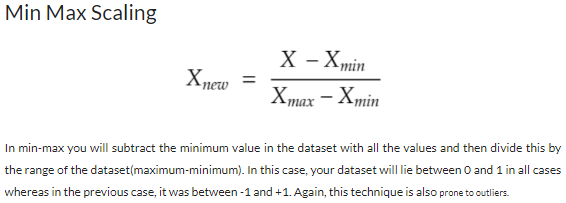
- We can not use **Standard scaling.** --> As that is used when the variable have normal distribution, that is most of the observation lies in the middle. Eg. price (here), age or salary.
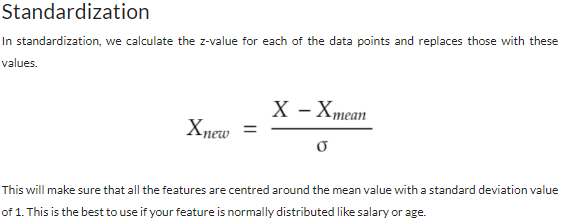
- We will be using **Robust Scaling.** 
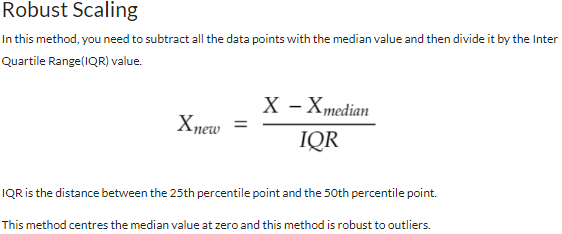

<Axes: >

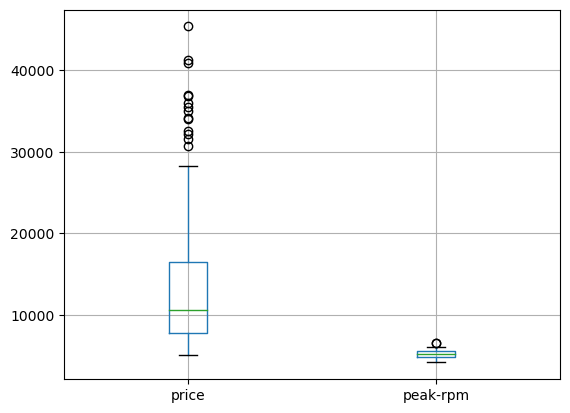

In [246]:
df.boxplot(column = ['price','peak-rpm'])

In [357]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Applying scalar to all the numerical variables

num_vars = ['normalized-losses', 'wheel-base', 'height', 'num-of-cylinders', 'bore', 'stroke', 'compression-ratio', 
           'peak-rpm', 'price', 'engine-size/horsepower', 'curb-weight/engine-size', 'width/length', 'highway-mpg/city-mpg']


df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

normalized-losses  wheel-base    height  num-of-cylinders      bore  \
0           0.000000   -1.063291 -1.514286               0.0  0.372093   
1           0.000000   -1.063291 -1.514286               0.0  0.372093   
2           0.000000   -0.316456 -0.485714               2.0 -1.465116   
3           1.166667    0.354430  0.057143               0.0 -0.279070   
4           1.166667    0.303797  0.057143               1.0 -0.279070   

     stroke  compression-ratio  peak-rpm     price  engine-size/horsepower  \
0 -2.033333               0.00 -0.285714  0.332874               -0.401483   
1 -2.033333               0.00 -0.285714  0.677801               -0.401483   
2  0.600000               0.00 -0.285714  0.677801               -1.086723   
3  0.366667               1.25  0.428571  0.385101               -0.783041   
4  0.366667              -1.25  0.428571  0.786846               -0.358925   

   ...  engine-type_ohcv  engine-type_rotor  fuel-system_1bbl  \
0  ...                 0                  0                 0   
1  ...                 0                  0                 0   
2  ...                 1                  0                 0   
3  ...                 0                  0                 0   
4  ...                 0                  0                 0   

   fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                0                0   
3                 0                 0                0                0   
4                 0                 0                0                0   

   fuel-system_mpfi  fuel-system_spdi  fuel-system_spfi  
0                 1                 0                 0  
1                 1                 0                 0  
2                 1                 0                 0  
3                 1                 0                 0  
4                 1                 0                 0  

[5 rows x 44 columns]

#### Dividing into X and Y sets for the model building

In [358]:
X = df.drop(["price"], axis = 1)
y = df["price"]

In [359]:
X.head()

normalized-losses  wheel-base    height  num-of-cylinders      bore  \
0           0.000000   -1.063291 -1.514286               0.0  0.372093   
1           0.000000   -1.063291 -1.514286               0.0  0.372093   
2           0.000000   -0.316456 -0.485714               2.0 -1.465116   
3           1.166667    0.354430  0.057143               0.0 -0.279070   
4           1.166667    0.303797  0.057143               1.0 -0.279070   

     stroke  compression-ratio  peak-rpm  engine-size/horsepower  \
0 -2.033333               0.00 -0.285714               -0.401483   
1 -2.033333               0.00 -0.285714               -0.401483   
2  0.600000               0.00 -0.285714               -1.086723   
3  0.366667               1.25  0.428571               -0.783041   
4  0.366667              -1.25  0.428571               -0.358925   

   curb-weight/engine-size  ...  engine-type_ohcv  engine-type_rotor  \
0                -0.497349  ...                 0                  0   
1                -0.497349  ...                 0                  0   
2                -0.901061  ...                 1                  0   
3                 0.225652  ...                 0                  0   
4                -0.039786  ...                 0                  0   

   fuel-system_1bbl  fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  \
0                 0                 0                 0                0   
1                 0                 0                 0                0   
2                 0                 0                 0                0   
3                 0                 0                 0                0   
4                 0                 0                 0                0   

   fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  fuel-system_spfi  
0                0                 1                 0                 0  
1                0                 1                 0                 0  
2                0                 1                 0                 0  
3                0                 1                 0                 0  
4                0                 1                 0                 0  

[5 rows x 43 columns]

In [360]:
y.head()

0    0.332874
1    0.677801
2    0.677801
3    0.385101
4    0.786846
Name: price, dtype: float64

#### Splitting of data into training and testing sets

In [361]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

# shape of the train and test sets
print(X_train.shape)
print(X_test.shape)

(143, 43)
(62, 43)


### Building model (training and testing)

We will be using the **LinearRegression** function from SciKit Learn for its compatibility with **RFE** (which is a utility from sklearn)

Typically, a simpler and better-performing machine learning model can be developed by removing input features (columns) from the training dataset. This is called feature selection and there are many different types of algorithms that can be used.

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

**RFE ( Recursive feature elimination )**

- RFE stands for Recursive Feature Elimination. It is a feature selection technique (wrapper) used in machine learning to select the most relevant features from a given set of features.

- The RFE algorithm works by recursively eliminating features from the feature set, fitting the model with the remaining features, and evaluating the performance. It assigns weights to each feature based on their importance or ranking. Then, it removes the features with the lowest weights and repeats the process until a desired number of features remains.

- RFE helps to identify a subset of features that are most informative or contribute the most to the predictive power of the model. It can be used in conjunction with various machine learning algorithms to improve model performance, reduce overfitting, and enhance interpretability by focusing on the most relevant features.

Steps:-

- 1) To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

- 2) The chosen algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.

- 3) Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.

- 4) It can then be applied to the training and test datasets by calling the transform() function.

- 5) It is common to use k-fold cross-validation to evaluate a machine learning algorithm on a dataset. When using cross-validation, it is good practice to perform data transforms like RFE as part of a Pipeline to avoid data leakage

https://machinelearningmastery.com/rfe-feature-selection-in-python/

**Note:- To select the optimal number of features to select ( n_features_to_select ) consider foll. example:-** 

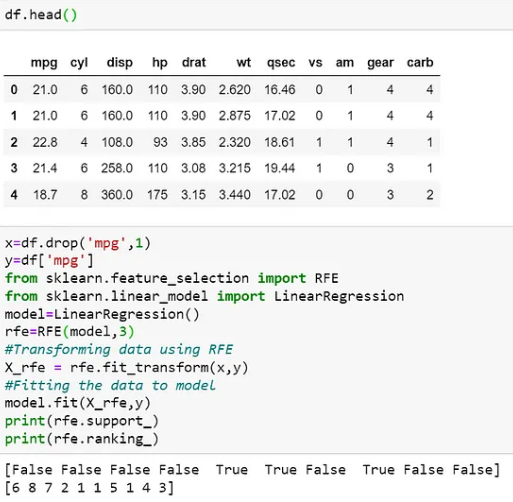
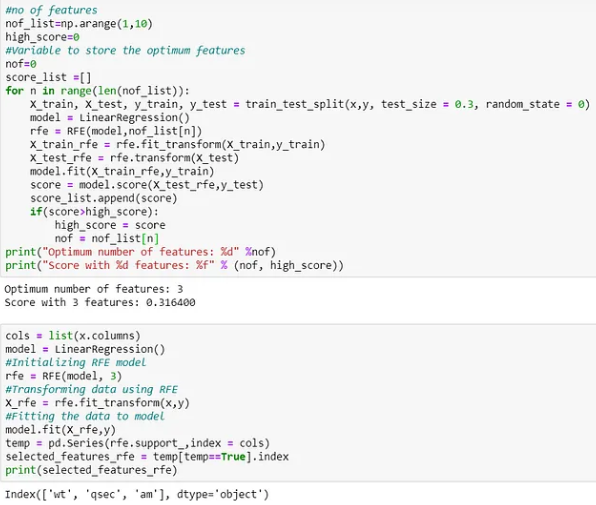

In [258]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [363]:
# Running RFE with the output number of the variable equal to 10 ( We have arbitary picked "n_features_to_select" = 10 ) 
# However, this is not a right approach. (see the link above)
  # --> You can check what is the best number of variable (hyperparameter) by cross validation (or) by automatic selection through RFECV

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)       # (or) RFE(estimator = lm , n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

list(zip( X_train.columns , rfe.support_ , rfe.ranking_ ))

[('normalized-losses', False, 24),
 ('wheel-base', True, 1),
 ('height', False, 19),
 ('num-of-cylinders', False, 5),
 ('bore', False, 4),
 ('stroke', False, 16),
 ('compression-ratio', False, 23),
 ('peak-rpm', False, 25),
 ('engine-size/horsepower', False, 8),
 ('curb-weight/engine-size', False, 17),
 ('width/length', False, 11),
 ('highway-mpg/city-mpg', False, 32),
 ('symboling_moderate', False, 31),
 ('symboling_risky', False, 14),
 ('symboling_safe', False, 9),
 ('make_high', True, 1),
 ('make_low', False, 2),
 ('make_med', False, 6),
 ('body-style_convertible', True, 1),
 ('body-style_hardtop', False, 13),
 ('body-style_hatchback', False, 12),
 ('body-style_sedan', False, 30),
 ('body-style_wagon', False, 29),
 ('drive-wheels_4wd', False, 27),
 ('drive-wheels_fwd', False, 26),
 ('drive-wheels_rwd', False, 15),
 ('engine-location_front', True, 1),
 ('engine-location_rear', True, 1),
 ('engine-type_dohc', True, 1),
 ('engine-type_dohcv', True, 1),
 ('engine-type_l', False, 28),
 (

In [364]:
col = X_train.columns[rfe.support_]
col

Index(['wheel-base', 'make_high', 'body-style_convertible',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_4bbl'],
      dtype='object')

In [365]:
X_train.columns[~rfe.support_]

Index(['normalized-losses', 'height', 'num-of-cylinders', 'bore', 'stroke',
       'compression-ratio', 'peak-rpm', 'engine-size/horsepower',
       'curb-weight/engine-size', 'width/length', 'highway-mpg/city-mpg',
       'symboling_moderate', 'symboling_risky', 'symboling_safe', 'make_low',
       'make_med', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

**OLS (Ordinary Least Squares)** is a method used for estimating the parameters in linear regression models. The "statsmodels" library in Python provides a comprehensive set of statistical models and tools for data analysis, including the OLS regression model.

While scikit-learn (sklearn) also offers a linear regression model with the LinearRegression class, there are some differences between statsmodels and sklearn that make them suitable for different purposes. 

The OLS method of "statsmodel" is used in case of:

- 1) **Model Interpretation:** statsmodels focuses on statistical inference and provides detailed statistical summaries of the model, including p-values, confidence intervals, and other statistical measures. It allows for in-depth analysis and interpretation of the model's parameters and statistical significance.

- 2) **Model Diagnostics:** statsmodels provides a range of diagnostic tools and statistical tests for checking the assumptions of the linear regression model, such as normality of residuals, homoscedasticity, and multicollinearity. It helps in assessing the quality and validity of the model.

On the other hand, **scikit-learn (sklearn)** is primarily focused on machine learning and predictive modeling tasks. It provides a consistent interface for various machine learning algorithms, including linear regression, but its primary goal is to optimize model performance rather than providing detailed statistical analysis.

If you are primarily interested in prediction and want a straightforward implementation of linear regression, sklearn is a good choice. However, if you require statistical analysis, interpretation of coefficients, or diagnostic tools, statsmodels with the OLS model may be more suitable.

In summary, the choice between statsmodels and sklearn depends on the specific requirements of your analysis, whether it leans towards statistical inference or predictive modeling.


#### Note: As our main aim is to analyse the model, thus we will be using OLS method

We know that multiple linear regression is represented as :

y = b0 + b1X1 + b2X2 + b3X3 +…..+ bnXn

but we can also, represent it as: 

y = b0X0 + b1X1 + b2X2 + b3X3 +…..+ bnXn ,,,   where X0 = 1

We have to add one column with all the same values as 1 to represent b0X0.

Why we need to do that?? 

 - statsmodels Python library provides an OLS(ordinary least square) class for implementing Backward Elimination. Now one thing to note that **OLS class does not provide the intercept by default and it has to be created by the user himself**. 
 - Thats the reason why we get different R2 values in sklearn Regression model and OLS statsmodel.
 - That is why we created a column with all same values as 1 to represent b0X0.


In [366]:
#importing required library
import statsmodels.api as sm  

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable column with all values as 1
X_train_rfe = sm.add_constant(X_train_rfe)    

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

# summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.98
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.03e-50
Time:                        14:31:16   Log-Likelihood:                -49.025
No. Observations:                 143   AIC:                             118.0
Df Residuals:                     133   BIC:                             147.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Oservations

**From the OLS regression results, we can infer the following:**

1. R-squared: The R-squared value of 0.847 indicates that the independent variables in the model explain approximately 84.7% of the variability in the dependent variable (price).

2. Coefficients: The coefficients (coef) represent the estimated effect of each independent variable on the dependent variable. For example, a one-unit increase in the wheel-base is associated with a 0.5222 unit increase in the price, holding other variables constant. The coefficients with p-values less than 0.05 are considered statistically significant.

3. Statistical significance: The p-values (P>|t|) associated with each coefficient indicate the statistical significance of the corresponding independent variable. Variables with p-values less than 0.05 are considered statistically significant.

4. Confidence intervals: The [0.025 0.975] values represent the lower and upper bounds of the 95% confidence interval for each coefficient. The true population parameter is estimated to lie within this interval with 95% confidence.

5. Model fit: The F-statistic (81.98) with a significant p-value (Prob (F-statistic) < 0.05) suggests that the overall model is statistically significant in explaining the variation in the dependent variable. The Adjusted R-squared value (0.837) takes into account the number of variables in the model and provides a more accurate measure of the goodness of fit.

6. Diagnostic tests: The Omnibus test, Jarque-Bera test, and Durbin-Watson statistic are used to assess the assumptions of the regression model, such as normality of residuals and absence of autocorrelation. A significant p-value in the Omnibus and Jarque-Bera tests indicates departure from normality, while the Durbin-Watson value (2.082) suggests no significant autocorrelation.

Overall, based on the provided results, the model seems to have a good fit (as indicated by the R-squared and Adjusted R-squared values) and the selected independent variables have statistically significant relationships with the dependent variable. However, it is important to consider other factors such as the domain knowledge and the context of the problem when interpreting and drawing conclusions from the regression analysis.

**Multicollinearity in Regression Analysis**

**Multicollinearity** occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

If you can identify which variables are affected by multicollinearity and the strength of the correlation, you’re well on your way to determining whether you need to fix it. Fortunately, there is a very simple test to assess multicollinearity in your regression model. The variance inflation factor (VIF) identifies correlation between independent variables and the strength of that correlation.

Statistical software calculates a VIF for each independent variable. VIFs start at 1 and have no upper limit. A value of 1 indicates that there is no correlation between this independent variable and any others. VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures. VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

#### VIF(Variance Inflation Factor)

In [367]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Python\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Python\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features   VIF
4    engine-location_front   inf
5     engine-location_rear   inf
9        engine-type_rotor  3.93
10        fuel-system_4bbl  3.92
2                make_high  1.45
1               wheel-base  1.39
3   body-style_convertible  1.23
6         engine-type_dohc  1.15
7        engine-type_dohcv  1.08
8         engine-type_ohcv  1.08
0                    const  0.00

**'engine-location_front', 'engine-location_rear'** seems to have greater VIF so, we have to rebuild the model by removing them one by one

In [369]:
# Rebuilding model w/o 'engine-location_front'

X_train_new = X_train_rfe.drop(['engine-location_front'], axis = 1)

In [370]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#summary of new linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.98
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.03e-50
Time:                        20:12:12   Log-Likelihood:                -49.025
No. Observations:                 143   AIC:                             118.0
Df Residuals:                     133   BIC:                             147.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [377]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Check all VIF should be less than 5 and there p-value should also be low ( generally less than 0.05 )

Features   VIF
8       engine-type_rotor  3.93
9        fuel-system_4bbl  3.92
2               make_high  1.45
1              wheel-base  1.39
0                   const  1.31
3  body-style_convertible  1.23
5        engine-type_dohc  1.15
4    engine-location_rear  1.14
6       engine-type_dohcv  1.08
7        engine-type_ohcv  1.08

**'fuel-system_4bbl'** seems to have higher VIF and higher p-value (0.327) so, we have to rebuild the model by removing it.

In [381]:
# Rebuilding model w/o 'engine-location_front'

X_train_new = X_train_new.drop(['fuel-system_4bbl'], axis = 1)

In [382]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#summary of new linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     92.13
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.14e-50
Time:                        20:32:10   Log-Likelihood:                -49.544
No. Observations:                 143   AIC:                             117.1
Df Residuals:                     134   BIC:                             143.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [383]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               make_high  1.45
1              wheel-base  1.39
0                   const  1.31
3  body-style_convertible  1.23
5        engine-type_dohc  1.15
4    engine-location_rear  1.14
6       engine-type_dohcv  1.08
7        engine-type_ohcv  1.08
8       engine-type_rotor  1.01

Now, the model looks significant with independent variables having low p-value and low VIF

**Residual Analysis of the train data**
So, now to check if the error terms are also normally distributed. Plot the histogram of the error terms

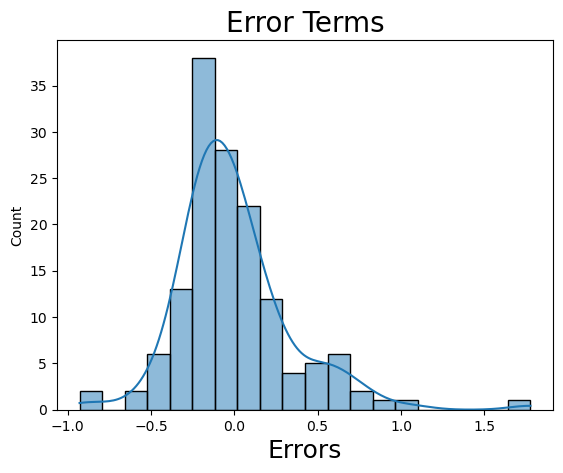

In [385]:
y_train_pred = lm.predict(X_train_lm)

# Plot the histogram of the error terms
sns.histplot((y_train - y_train_pred), kde = True, bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Thus, the train data residuals follow the normal distribution.

Our final independent variables for the model are:

In [390]:
X_train_lm.drop(["const"], inplace = True, axis = 1)

KeyError: "['const'] not found in axis"

In [397]:
final_col = list(X_train_lm.columns)
final_col

['wheel-base',
 'make_high',
 'body-style_convertible',
 'engine-location_rear',
 'engine-type_dohc',
 'engine-type_dohcv',
 'engine-type_ohcv',
 'engine-type_rotor']

#### Making Predictions - Test Data

In [399]:
X_test_new = X_test[final_col]

In [400]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [402]:
# Making predictions

y_pred = lm.predict(X_test_new) 

In [403]:
# model evaluation

from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.8716268456230233

- **r_square value of the test set: 0.872**
- **r_square value of the train set: 0.846**
    
This proves that the model built is significant

#### Model Evaluation

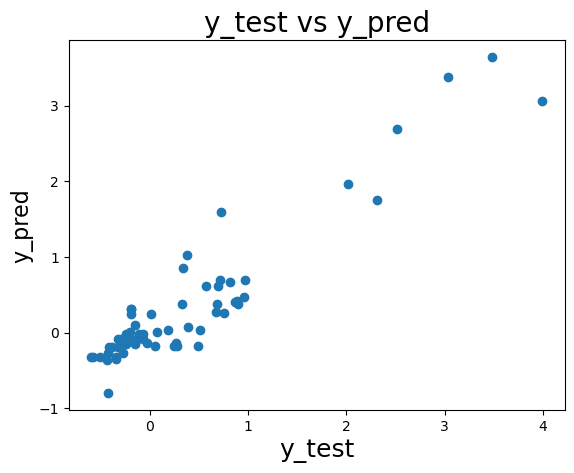

In [404]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### Method 2 :- MLR ( using sklearn )
If only prediction we have to do

In [259]:
X1 = X.copy()
y1 = y.copy()

In [260]:
X1_tr, X1_te, y1_tr, y1_te = train_test_split(X1, y1, train_size = 0.7, random_state = 100)

In [261]:
l_mod = LinearRegression()
l_mod.fit(X1_tr, y1_tr)

LinearRegression()

In [262]:
y1_pr = l_mod.predict(X1_te)

In [263]:
y1_pr

array([-0.3122306 , -0.00604181, -0.01595455,  0.10791251, -0.44582401,
       -0.02951882,  0.85781841,  0.87344389,  0.70908111,  0.50080241,
        0.85552153,  0.46857921,  0.1756388 ,  0.02998382,  3.18682149,
       -0.53559679, -0.31739016,  0.39592507,  0.92456903,  0.21619585,
        0.54475492,  0.54126589,  2.68973829, -0.46942317,  0.16895556,
        0.60569273,  0.33015668,  2.11236196,  1.31374262,  0.43417689,
       -0.39723572,  2.00157809,  0.83303111,  1.08626605,  0.48043231,
        0.15402876, -0.66357102,  0.14341455, -0.47482228, -0.02239599,
        2.75113063,  0.30782096, -0.43264217, -0.13645897, -0.51318517,
       -0.22082008, -0.33981257, -0.18882691, -0.11505881,  0.04576566,
       -0.31972632,  0.16796897, -0.4870867 ,  0.01476246,  0.80164447,
       -0.22366577, -0.10511061, -0.17026066,  0.44817156, -0.16247648,
       -0.23972134,  3.15769713])

In [266]:
# performance of the model

from sklearn.metrics import mean_squared_error    
from sklearn.metrics import r2_score

R2_1 = r2_score(y1_te, y1_pr)         # Testing R-square  
print("R Square Score :", R2_1)

RMSE_1 = np.sqrt(mean_squared_error(y1_te, y1_pr))         # Root Mean Square Error
print("RMSE :", RMSE_1)

# It means the model is 90 % good fit

R Square Score : 0.9026160714894478
RMSE : 0.2997540363376123


In [267]:
l_mod.coef_  # These are the coefficients of 43 independent variables (X1.columns)

# These coefficients indicate the change in the dependent variable (the variable you are trying to predict) for a unit change in the corresponding feature, assuming all other features are held constant. 
   # --> Positive coefficients suggest a positive relationship, meaning an increase in the feature value leads to an increase in the dependent variable. 
   # --> Negative coefficients suggest a negative relationship, meaning an increase in the feature value leads to a decrease in the dependent variable.

# The magnitude of the coefficient represents the strength of the relationship. 
   # --> Larger absolute values indicate a stronger impact on the dependent variable.

array([-0.05953364,  0.39387513, -0.09435012,  0.27148284,  0.24150536,
        0.08832723, -0.06378076,  0.05262431, -0.10700063,  0.09166278,
        0.09322288,  0.00850391,  0.01053012,  0.13883457, -0.14936469,
        0.66593309, -0.46101423, -0.20491886,  0.33821652, -0.12157502,
       -0.14982914, -0.01889701, -0.04791535, -0.03818846, -0.04977422,
        0.08796268, -0.66132784,  0.66132784,  0.44235595, -2.11323645,
       -0.02434358,  0.37972866,  0.2649039 ,  0.54113671,  0.50945481,
       -0.18064647, -0.11648849, -0.538905  ,  1.20055018,  0.        ,
       -0.08650056, -0.27800966,  0.        ])

In [269]:
l_mod.intercept_

0.7503979332075927

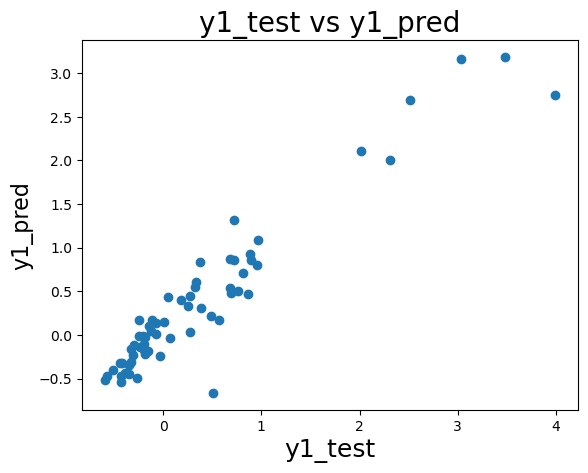

In [405]:
plt.scatter(y1_te,y1_pr)
plt.title('y1_test vs y1_pred', fontsize=20)              # Plot heading 
plt.xlabel('y1_test', fontsize=18)                          # X-label
plt.ylabel('y1_pred', fontsize=16)                          # Y-label
plt.show()